In [1]:
import pandas as pd #Data manipulation and analysis
import numpy as np  #	Numerical computations
from datetime import datetime, timedelta #Used for working with date and time data (timestamps, time differences, etc.).
import holidays  # For marking holiday flights,Detects whether a given date is a public holiday
import matplotlib.pyplot as plt #Data Visualization,Helps create plots and charts for data visualization.
import seaborn as sns     # Statistical Data Visualization
import requests           #fetching external data from APIs or web services
import time              #Measures execution time and adds delays,Performance Measurement & Delays


Load and Explore the Dataset

In [2]:
# Load dataset
file_path = '/content/Data_Train (3).xlsx' # Replace with your dataset path
data = pd.read_excel(file_path)

Size of data set

In [3]:
#Displays the number of rows and columns in the dataset.
data.shape

(10683, 11)

Inspect the dataset

In [4]:
#Displays the first three rows of the dataset
data.head(3)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882


In [5]:
data.iloc[-2:]  # Retrieves the last 2 rows


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648
10682,Air India,9/05/2019,Delhi,Cochin,DEL → GOI → BOM → COK,10:55,19:15,8h 20m,2 stops,No info,11753


#information about the data

In [6]:
# Displays summary information about the dataset, including column names, data types, and non-null values.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [7]:
#Prints all column names
print(data.columns)


Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price'],
      dtype='object')


In [8]:
#Provides statistical descriptions
data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


Check for missing values

In [9]:
#Counts the number of missing values in each column.
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


Adding some neccesary data fields to already existing excel data set

In [10]:
# Installing necessary libraries for data analysis, Excel file handling, geolocation, web requests, date/time processing, and holiday detection
!pip install pandas openpyxl geopy requests python-dateutil holidays

In [11]:
# Reading the Excel file into a pandas DataFrame using the openpyxl engine for proper `.xlsx` file handling
data = pd.read_excel(file_path, engine='openpyxl')



Add Cabin Class

In [12]:
cabin_classes = ['Economy', 'Business', 'First Class']  # Define available cabin classes
data['Cabin_Class'] = np.random.choice(cabin_classes, size=len(data))  # Assign random cabin classes to each row


Extract Layover Information from Route

In [13]:
# Function to calculate the number of stops (layovers) in a flight route
def get_layover(route):
    stops = route.count('→')  # Count the number of '→' symbols indicating stops
    return stops, "Direct" if stops == 0 else f"{stops} Stop(s)"  # Return stop count and label

# Apply the function to the 'Route' column and create two new columns: 'Number_of_Stops' and 'Flight_Layover'
data[['Number_of_Stops', 'Flight_Layover']] = data['Route'].apply(lambda x: pd.Series(get_layover(str(x))))


Calculate Days Until Departure

In [14]:
# Convert the 'Date_of_Journey' column to a pandas datetime object for further manipulation
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'], format='%d/%m/%Y')

# Generate random 'Booking_Date' between 1 and 60 days before 'Date_of_Journey'
data['Booking_Date'] = data['Date_of_Journey'] - pd.to_timedelta(np.random.randint(1, 60, size=len(data)), unit='D')

# Calculate 'Days_Until_Departure' by finding the difference in days between 'Date_of_Journey' and 'Booking_Date'
data['Days_Until_Departure'] = (data['Date_of_Journey'] - data['Booking_Date']).dt.days


 fetching holidays in 2019

In [15]:
import requests  # Importing the 'requests' library to send HTTP requests to external APIs
import pandas as pd  # Importing pandas for data manipulation (not actively used in this part)

# Replace with your actual API key from Calendarific
API_KEY = "NGcTjMSkwkZd1LT0ltkzOf9UdY0EzJ2k"  # API key for authentication with Calendarific API

# Define the API endpoint for fetching holidays in 2019
url = f"https://calendarific.com/api/v2/holidays?api_key={API_KEY}&country=IN&year=2019"  # Constructing the API URL with parameters

# Make the API request
response = requests.get(url)  # Sending GET request to the API to fetch holiday data

# Check if the request was successful (Status Code 200 indicates success)
if response.status_code == 200:
    holidays_data = response.json()  # Parse the JSON response from the API

    # Extract holiday details from the response
    holidays_list = holidays_data.get("response", {}).get("holidays", [])  # Extract the holidays data

    # Display the holiday details
    print(f"Airline Holidays for 2019 in India:\n")  # Print header message for holidays list

    holiday_dates = []  # Initialize an empty list to store holiday dates
    for holiday in holidays_list:  # Loop through each holiday in the holidays list
        holiday_date = holiday["date"]["iso"][:10]  # Extract date in 'YYYY-MM-DD' format
        holiday_name = holiday["name"]  # Extract the name of the holiday
        holiday_type = holiday["type"]  # Extract the type of the holiday
        holiday_dates.append(holiday_date)  # Add the holiday date to the list
        # print(f"Date: {holiday_date} | Name: {holiday_name} | Type: {holiday_type}")

else:
    print(f"Error: Unable to fetch holiday data (Status Code: {response.status_code})")  # Print error message if request fails


Airline Holidays for 2019 in India:



 Mark Holiday Season Flights

In [16]:
    # Convert holiday dates to datetime format for comparison
    holiday_dates = pd.to_datetime(holiday_dates, format='%Y-%m-%d') # Specify the format

    # Mark flights as part of the holiday season (1 if holiday, 0 if not)
    data['Is_Holiday_Season'] = data['Date_of_Journey'].isin(holiday_dates).astype(int)
    #print(data)

Off-Peak Season Flag

In [17]:
# Function to determine if the flight is in the peak season
def is_peak_season(row):
    # Define peak_months here
    peak_months = [12, 1, 2, 3, 4]  # Example: December to April are peak months

    # Check if the flight date is during a holiday or in peak months
    if row['Date_of_Journey'] in holiday_dates or row['Date_of_Journey'].month in peak_months:
        return 1  # Peak season
    return 0  # Non-peak season

# Apply the function to create the 'Is_Peak_Season' column
data['Is_Peak_Season'] = data.apply(is_peak_season, axis=1)
# Now, let's analyze fare prices during peak season vs non-peak season
peak_fares = data[data['Is_Peak_Season'] == 1]['Price']
non_peak_fares = data[data['Is_Peak_Season'] == 0]['Price']
# Calculate average fare for peak and non-peak season
average_peak_fare = peak_fares.mean()
average_non_peak_fare = non_peak_fares.mean()

print(f"Average fare during peak season: {average_peak_fare}")
print(f"Average fare during non-peak season: {average_non_peak_fare}")
print(data)

Average fare during peak season: 9173.056744749596
Average fare during non-peak season: 9012.76025126505
           Airline Date_of_Journey    Source Destination  \
0           IndiGo      2019-03-24  Banglore   New Delhi   
1        Air India      2019-05-01   Kolkata    Banglore   
2      Jet Airways      2019-06-09     Delhi      Cochin   
3           IndiGo      2019-05-12   Kolkata    Banglore   
4           IndiGo      2019-03-01  Banglore   New Delhi   
...            ...             ...       ...         ...   
10678     Air Asia      2019-04-09   Kolkata    Banglore   
10679    Air India      2019-04-27   Kolkata    Banglore   
10680  Jet Airways      2019-04-27  Banglore       Delhi   
10681      Vistara      2019-03-01  Banglore   New Delhi   
10682    Air India      2019-05-09     Delhi      Cochin   

                       Route Dep_Time  Arrival_Time Duration Total_Stops  \
0                  BLR → DEL    22:20  01:10 22 Mar   2h 50m    non-stop   
1      CCU → IXR → BBI

adding Fuel price by using API  once check

In [18]:


# Replace with your actual API key
#API_KEY = "f695fbbb339ef3304ccefdd7091f56debe745901584075b65ef83213eba85aaf"

# Define the URL for the API request (this is just an example)
#url = f"https://api.oilpriceapi.com/v1/prices?api_key={API_KEY}&start_date=2019-01-01&end_date=2019-12-31"
# Make the API request to get the latest fuel prices
#response = requests.get(url)

# Check if the request was successful
#if response.status_code == 200:
  #Parse the response JSON
 # fuel_data = response.json()

     # Extract the fuel prices from the response
  #fuel_prices = pd.DataFrame(fuel_data['data'], columns=['date', 'price'])
  #fuel_prices['date'] = pd.to_datetime(fuel_prices['date'])  # Convert to datetime



    # Merge the fuel prices with flight data based on the 'Date_of_Journey'
  #data = data.merge(fuel_prices, left_on='Date_of_Journey', right_on='date', how='left')

    # Rename the 'price' column to 'Fuel_Price'
  #data.rename(columns={'price': 'Fuel_Price'}, inplace=True)

    # Drop the 'date' column after merge
  #data.drop(['date'], axis=1, inplace=True)

    # Display the merged data
  #print(data)
#else:
 #   print(f"Error: Unable to fetch fuel prices (Status Code: {response.status_code})")
#print(data)


Adding Simulated Data to oil Prices

In [19]:
# Set random seed for reproducibility
np.random.seed(42)
# Use NumPy's RandomState for fixed randomness
#random_state = np.random.RandomState(42)  # Fixed state
fuel_price_data = pd.DataFrame({
    'Date': pd.date_range(start='2019-01-01', periods=365, freq='D'),
    'Fuel_Price_INR': np.random.uniform(60000, 90000, size=365)  # ATF price in INR per kiloliter

})

# Merge fuel prices with dataset
fuel_price_data['Date'] = pd.to_datetime(fuel_price_data['Date'])
data = data.merge(fuel_price_data, left_on='Booking_Date', right_on='Date', how='left', suffixes=('', '_fuel'))
data.rename(columns={'Fuel_Price_INR': 'ATF_Price_INR'}, inplace=True)
data.drop(columns=['Date'], inplace=True)
#print(data)

In [20]:
print(data.head(5))

       Airline Date_of_Journey    Source Destination                  Route  \
0       IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1    Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   
2  Jet Airways      2019-06-09     Delhi      Cochin  DEL → LKO → BOM → COK   
3       IndiGo      2019-05-12   Kolkata    Banglore        CCU → NAG → BLR   
4       IndiGo      2019-03-01  Banglore   New Delhi        BLR → NAG → DEL   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  Price  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info   3897   
1    05:50         13:15   7h 25m     2 stops         No info   7662   
2    09:25  04:25 10 Jun      19h     2 stops         No info  13882   
3    18:05         23:30   5h 25m      1 stop         No info   6218   
4    16:50         21:35   4h 45m      1 stop         No info  13302   

   Cabin_Class  Number_of_Stops Flight_Layover Booking_Date  \
0     Business               

In [21]:
# Save the simulated data to a CSV file
#fuel_price_data.to_csv("fuel_price_data_2019.csv", index=False)

In [22]:

data.to_excel("Updated_Flight_Fare_Data.xlsx", index=False, engine='openpyxl')

print("✅ Updated dataset saved successfully!")

✅ Updated dataset saved successfully!


save an updated file in Google Colab

In [23]:
data.to_csv('/content/fuel_price_data_2019.csv', index=False)
# Assuming the updated data is in a DataFrame called 'data'
data.to_csv('/content/updated_file.csv', index=False)


In [24]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Cabin_Class,Number_of_Stops,Flight_Layover,Booking_Date,Days_Until_Departure,Is_Holiday_Season,Is_Peak_Season,ATF_Price_INR
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Business,1,1 Stop(s),2019-02-06,46,0,1,69138.413075
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,First Class,3,3 Stop(s),2019-04-24,7,1,1,84243.611387


In [25]:
#Fetch all Columns
data.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Cabin_Class', 'Number_of_Stops',
       'Flight_Layover', 'Booking_Date', 'Days_Until_Departure',
       'Is_Holiday_Season', 'Is_Peak_Season', 'ATF_Price_INR'],
      dtype='object')

In [26]:
data.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Cabin_Class,Number_of_Stops,Flight_Layover,Booking_Date,Days_Until_Departure,Is_Holiday_Season,Is_Peak_Season,ATF_Price_INR
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,Business,1,1 Stop(s),2019-02-06,46,0,1,69138.413075
1,Air India,2019-05-01,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,First Class,3,3 Stop(s),2019-04-24,7,1,1,84243.611387


Data Analysis And Visualization on train dataSet

In [27]:
#to extract names of airlines from the data
unique_airlines = pd.unique(data["Airline"])
print(unique_airlines)


['IndiGo' 'Air India' 'Jet Airways' 'SpiceJet' 'Multiple carriers' 'GoAir'
 'Vistara' 'Air Asia' 'Vistara Premium economy' 'Jet Airways Business'
 'Multiple carriers Premium economy' 'Trujet']


In [28]:
#Iterate through each column in the DataFrame and print the number of unique values in that column
for i in data:
    print(f"Number of unique values in {i} -->> {data[i].nunique()}")

Number of unique values in Airline -->> 12
Number of unique values in Date_of_Journey -->> 40
Number of unique values in Source -->> 5
Number of unique values in Destination -->> 6
Number of unique values in Route -->> 128
Number of unique values in Dep_Time -->> 222
Number of unique values in Arrival_Time -->> 1343
Number of unique values in Duration -->> 368
Number of unique values in Total_Stops -->> 5
Number of unique values in Additional_Info -->> 10
Number of unique values in Price -->> 1870
Number of unique values in Cabin_Class -->> 3
Number of unique values in Number_of_Stops -->> 6
Number of unique values in Flight_Layover -->> 6
Number of unique values in Booking_Date -->> 177
Number of unique values in Days_Until_Departure -->> 59
Number of unique values in Is_Holiday_Season -->> 2
Number of unique values in Is_Peak_Season -->> 2
Number of unique values in ATF_Price_INR -->> 177


In [29]:
#Print the count of each unique value in every column
for i in data:
    print(data[i].value_counts())

Airline
Jet Airways                          3849
IndiGo                               2053
Air India                            1752
Multiple carriers                    1196
SpiceJet                              818
Vistara                               479
Air Asia                              319
GoAir                                 194
Multiple carriers Premium economy      13
Jet Airways Business                    6
Vistara Premium economy                 3
Trujet                                  1
Name: count, dtype: int64
Date_of_Journey
2019-05-18    504
2019-06-06    503
2019-05-21    497
2019-06-09    495
2019-06-12    493
2019-05-09    484
2019-03-21    423
2019-05-15    405
2019-03-06    403
2019-05-27    382
2019-06-27    355
2019-06-24    351
2019-06-01    342
2019-06-03    333
2019-06-15    328
2019-03-24    323
2019-03-03    315
2019-03-09    302
2019-03-27    299
2019-05-24    286
2019-05-06    282
2019-05-01    277
2019-05-12    259
2019-04-01    257
2019-03-01    

 Visualisation of how do Layovers Affect Flight Prices by scatter plot

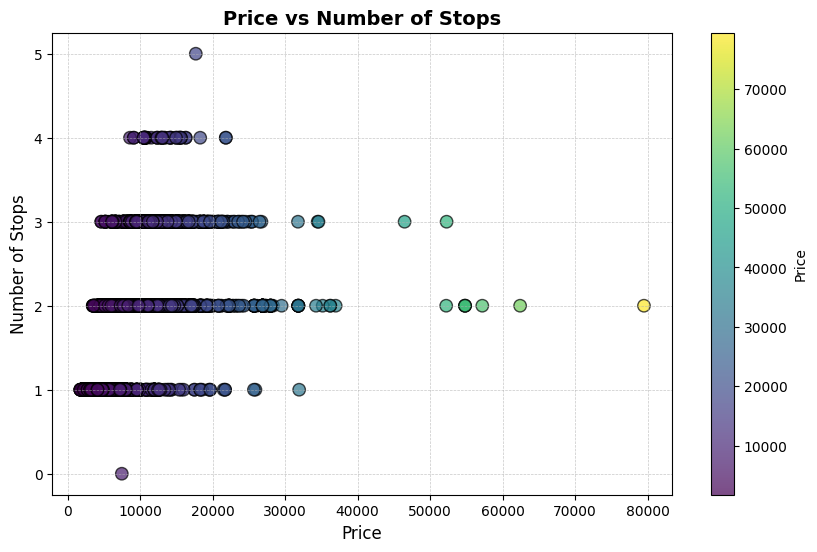

In [30]:
# Create a scatter plot with customized aesthetics
plt.figure(figsize=(10, 6))

# Use a color map to represent the data more beautifully
plt.scatter(data['Price'], data['Number_of_Stops'], s=80, alpha=0.7, c=data['Price'], cmap='viridis', edgecolors='black')

# Add a color bar to indicate the price scale
plt.colorbar(label='Price')

# Customize plot title and labels
plt.title('Price vs Number of Stops', fontsize=14, fontweight='bold')
plt.xlabel('Price', fontsize=12)
plt.ylabel('Number of Stops', fontsize=12)

# Add grid lines for better readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)
# Show the plot
plt.show()


Distribution of Flights Across Airlines

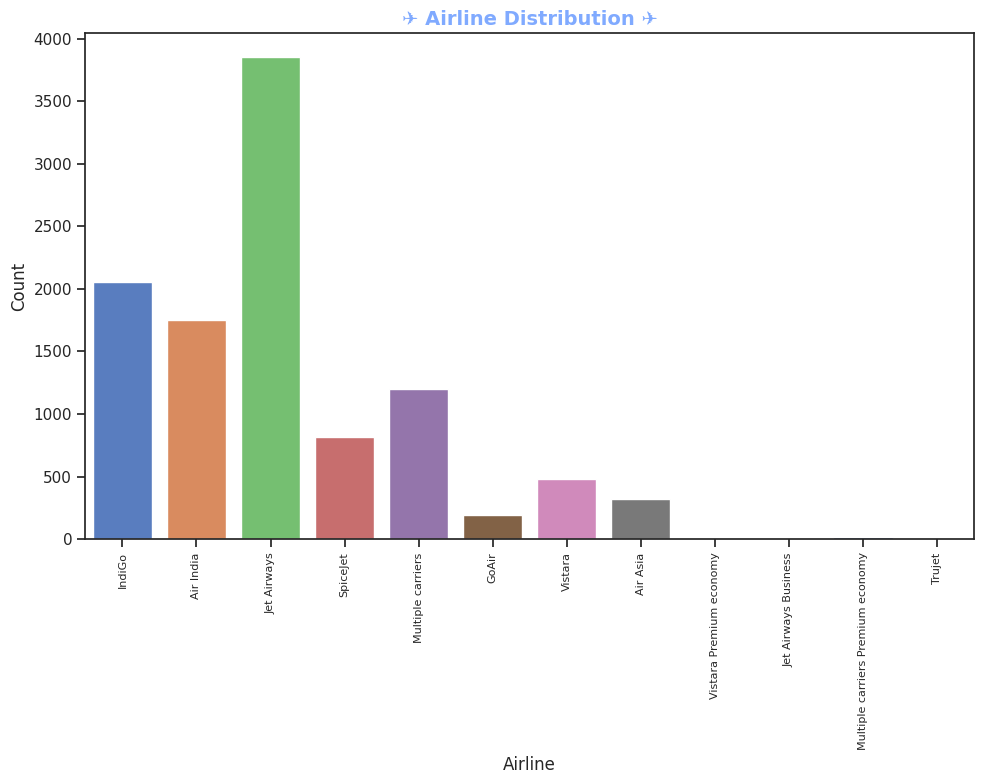

In [31]:
# Set a nice style
sns.set(style="ticks")

# Create the countplot with a color palette
plt.figure(figsize=(10, 8))
sns.countplot(x="Airline", data=data, hue="Airline",palette="muted",legend=False)


# Title and labels with styling
plt.title("✈️ Airline Distribution ✈️", fontweight="bold", fontsize=14, color="#80aaff")
plt.xlabel("Airline")
plt.ylabel("Count")

# Rotate x-tick labels for better readability
plt.xticks(rotation=90, fontsize=8)

# Show the plot
plt.tight_layout()
plt.show()


Visualizing how ticket fares vary across different airlines over the journey dates



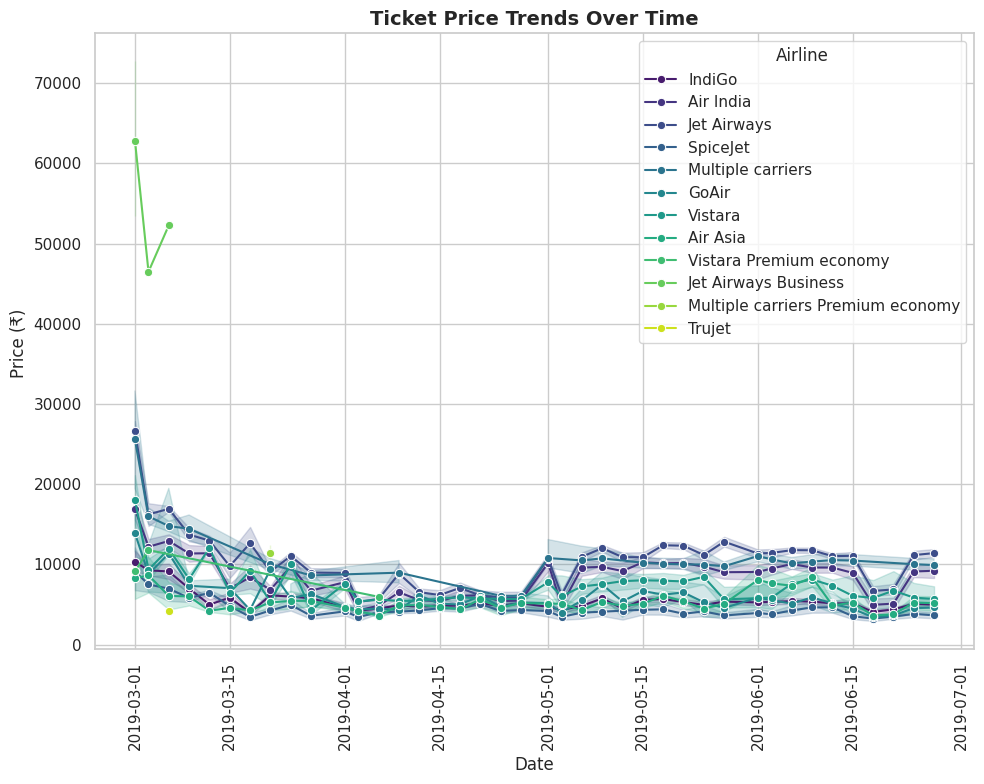

In [32]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create the line plot
plt.figure(figsize=(10, 8))
sns.lineplot(x="Date_of_Journey", y="Price", data=data, hue="Airline", marker="o", palette="viridis") # Changed x to "Date_of_Journey" and y to "Price"

# Add title and labels
plt.title("Ticket Price Trends Over Time", fontsize=14, fontweight="bold")
plt.xlabel("Date", fontsize=12)
plt.ylabel("Price (₹) ", fontsize=12)
plt.xticks(rotation=90)

# Show the plot
plt.tight_layout()
plt.show()


The distribution of bookings as the departure date approaches.

Days_Until_Departure
1     169
2     197
3     191
4     163
5     186
6     201
7     166
8     162
9     197
10    178
11    172
12    169
13    183
14    205
15    164
16    165
17    203
18    163
19    179
20    172
21    160
22    211
23    187
24    166
25    169
26    206
27    165
28    206
29    175
30    192
31    173
32    188
33    185
34    190
35    171
36    188
37    166
38    166
39    196
40    186
41    184
42    180
43    200
44    173
45    183
46    192
47    186
48    165
49    180
50    212
51    170
52    180
53    184
54    184
55    191
56    185
57    179
58    158
59    166
Name: count, dtype: int64


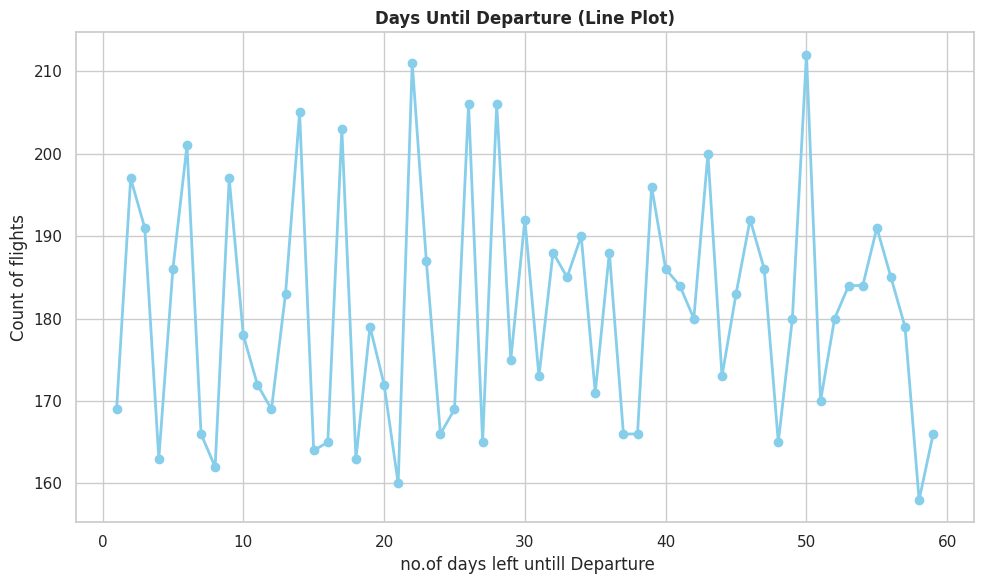

In [33]:
# Assuming 'Days_Until_Departure' is in your data, we first calculate the frequency of each unique value
days_count = data['Days_Until_Departure'].value_counts().sort_index()
print(days_count)
# Create a line plot for 'Days_Until_Departure'
plt.figure(figsize=(10,6))
plt.plot(days_count.index, days_count.values, marker='o', color='skyblue', linewidth=2)

# Add title and labels
plt.title('Days Until Departure (Line Plot)', fontsize=12, fontweight='bold')
plt.xlabel(' no.of days left untill Departure', fontsize=12)
plt.ylabel('Count of flights', fontsize=12)

# Remove top and right spines for a clean look
#plt.gca().spines[['top', 'right']].set_visible(False)

# Show the plot
plt.tight_layout()
plt.show()


Should keep this graph in last it would be better

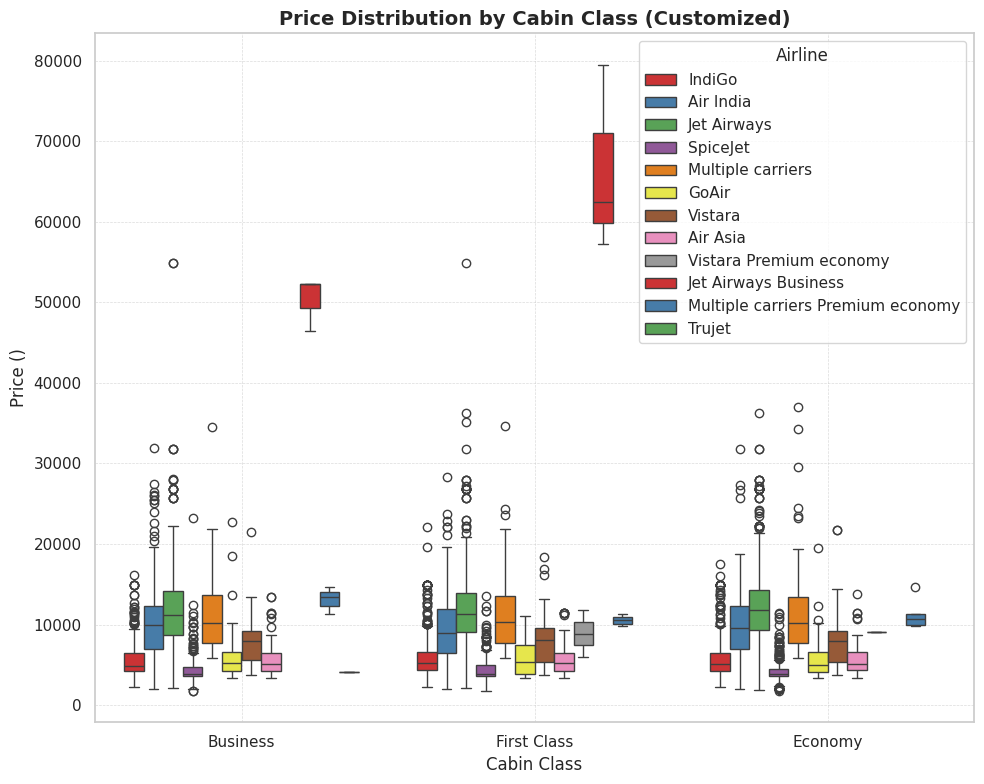

In [34]:
# Set style
sns.set(style="whitegrid")

# Create a boxplot with hue for another variable (e.g., Flight Type)
plt.figure(figsize=(10, 8))
#sns.boxplot(x="Cabin_Class", y="Price", data=data, palette=["#3498db", "#e74c3c"], hue="Airline")
sns.boxplot(x="Cabin_Class", y="Price", data=data, palette="Set1",hue="Airline")

# Customize title, labels, and grid lines
plt.title("Price Distribution by Cabin Class (Customized)", fontsize=14, fontweight='bold')
plt.xlabel("Cabin Class", fontsize=12)
plt.ylabel("Price ()", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


 Visualisation of Price Distribution by Cabin Class

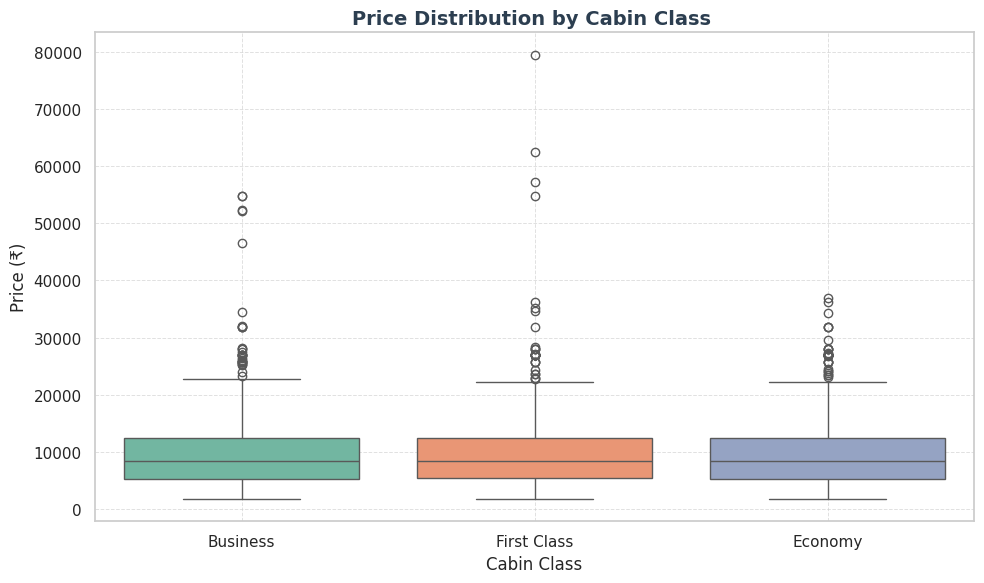

In [35]:
# Set style for a clean, modern look
sns.set(style="whitegrid")

# Create the boxplot for Cabin Class vs Price
plt.figure(figsize=(10, 6))
sns.boxplot(x="Cabin_Class", y="Price", data=data, palette="Set2",hue ="Cabin_Class" )

# Customize title, labels, and grid lines
plt.title("Price Distribution by Cabin Class ", fontsize=14, fontweight='bold', color="#2c3e50")
plt.xlabel("Cabin Class", fontsize=12)
plt.ylabel("Price (₹)", fontsize=12)
plt.grid(True, which='both', linestyle='--', linewidth=0.7, alpha=0.6)

# Show the plot
plt.tight_layout()
plt.show()


  Visualisation of Airline Price Distribution

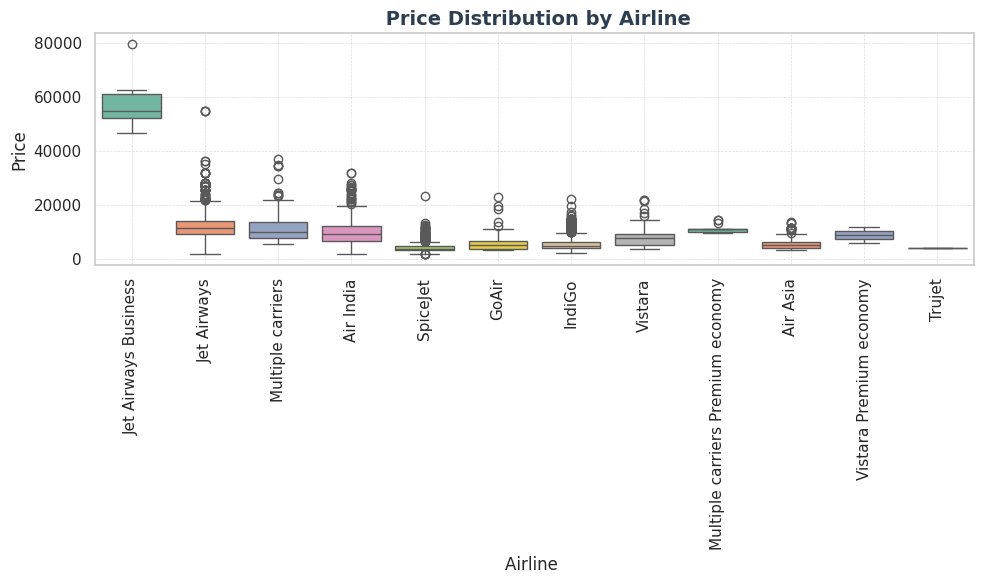

In [36]:
# Set style for a clean, modern look
sns.set(style="whitegrid")

# Create the boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x="Airline", y="Price", data=data.sort_values('Price', ascending=False), hue="Airline",palette="Set2")

# Customize title, labels, and grid lines with emojis
plt.title(" Price Distribution by Airline", fontsize=14, fontweight='bold', color="#2c3e50")
plt.xlabel("Airline ", fontsize=12)
plt.ylabel("Price", fontsize=12)

# Rotate x-axis labels for better readability
#plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xticks(rotation = 90)

# Remove top and right spines for a cleaner look
#sns.despine()

# Add grid lines for readability
plt.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


Visualizing the Correlation Matrix of Flight Fare Dataset

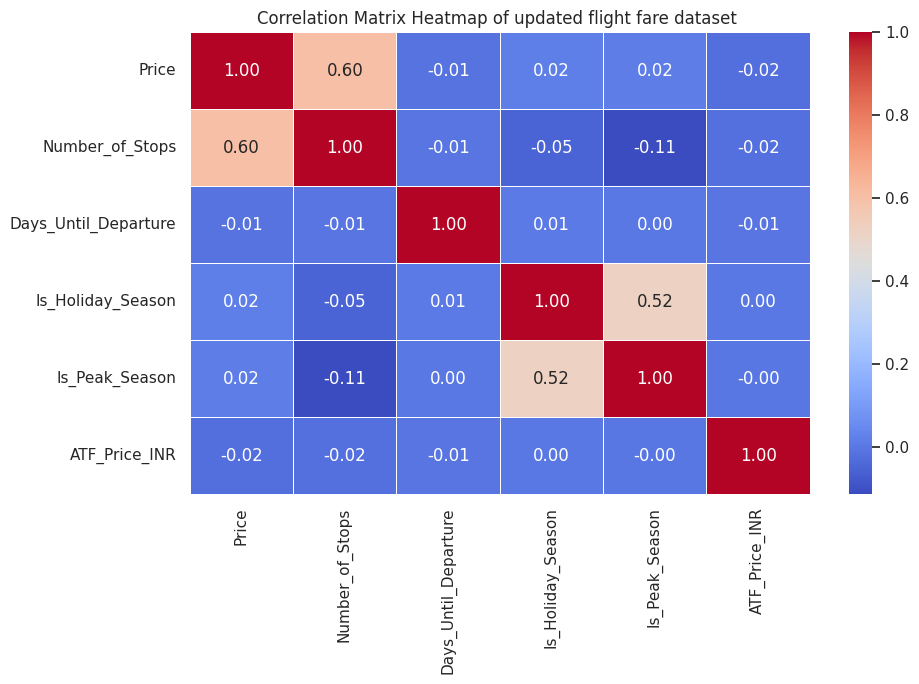

In [37]:
# Load the dataset
file_path = "Updated_Flight_Fare_Data.xlsx"  # Update with your correct file path
data = pd.read_excel(file_path)

# Compute the correlation matrix
corr_matrix = data.corr(numeric_only=True)  # Ensures only numeric columns are considered

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap of updated flight fare dataset ")
plt.show()


In [38]:
 #Top 10 used Routes and visualize using barplot

most_used_routes = data["Route"].value_counts().sort_values(ascending = False)[:10]
most_used_routes

,count
Route,
DEL → BOM → COK,2376
BLR → DEL,1552
CCU → BOM → BLR,979
CCU → BLR,724
BOM → HYD,621
CCU → DEL → BLR,565
BLR → BOM → DEL,402
MAA → CCU,381
DEL → HYD → COK,326


visualisation of top 10 most used routes using bar plot

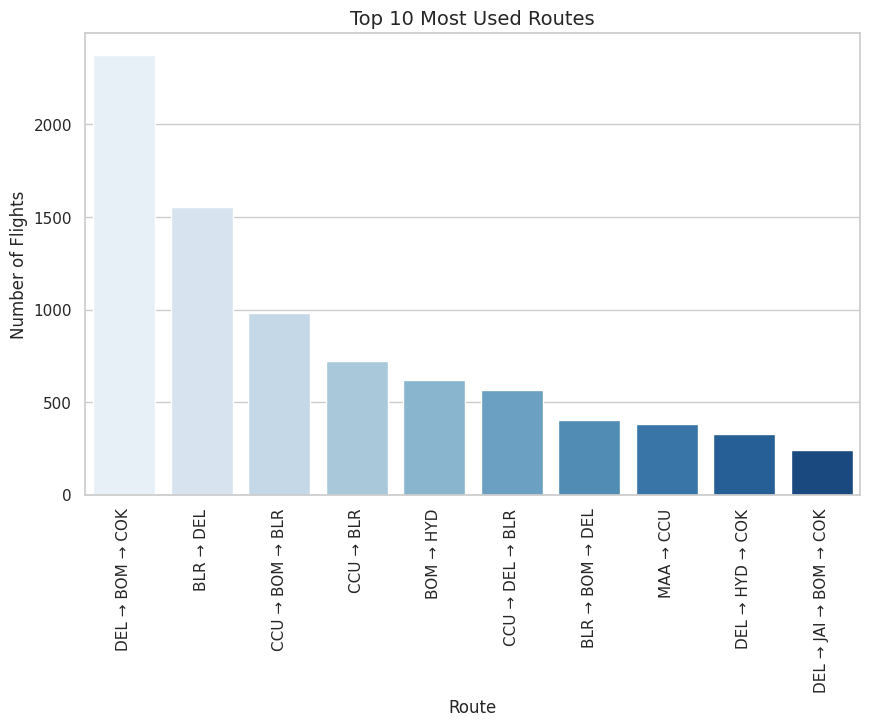

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x=most_used_routes.index, y=most_used_routes.values, palette="Blues",hue=most_used_routes.index)
# Customize the title and labels
plt.title('Top 10 Most Used Routes', fontsize=14)
plt.xlabel('Route', fontsize=12)
plt.ylabel('Number of Flights', fontsize=12)
plt.xticks(rotation=90)
plt.show()

 Impact of Fuel Price on Flight Price

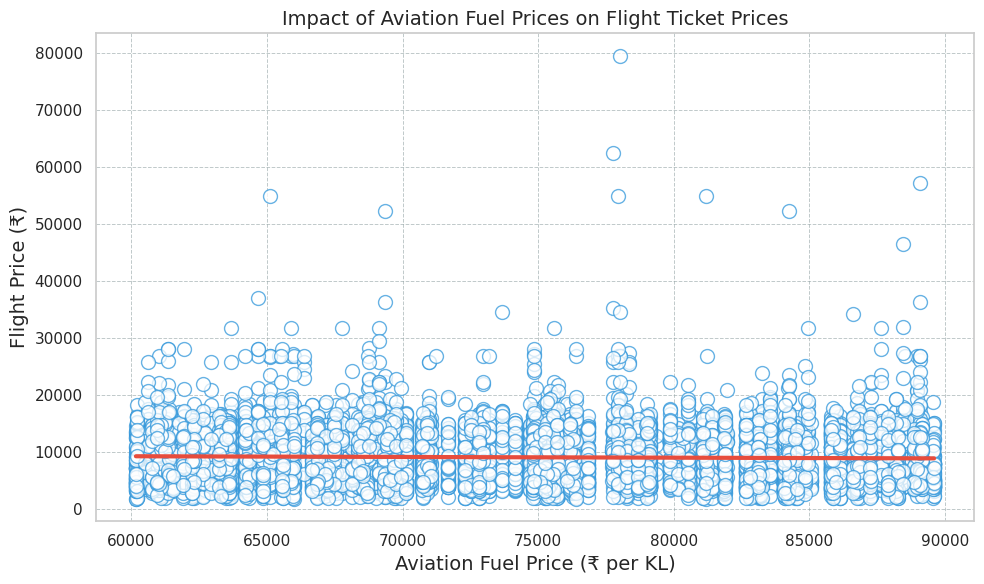

In [40]:
# Set Seaborn style
sns.set(style="whitegrid")

# Create figure
plt.figure(figsize=(10, 6))

# Define color palette
scatter_color = "#3498db"  # Blue
line_color = "#e74c3c"  # Red

# Create scatter plot with regression line
sns.regplot(
    x="ATF_Price_INR", y="Price", data=data, color=scatter_color,
    scatter_kws={"s": 100, "facecolors": "white", "edgecolor": scatter_color, "alpha": 0.75},
    line_kws={"color": line_color, "linewidth": 3}
)

# Customize title and labels
plt.title("Impact of Aviation Fuel Prices on Flight Ticket Prices", fontsize=14)
plt.xlabel("Aviation Fuel Price (₹ per KL)", fontsize=14)
plt.ylabel("Flight Price (₹)", fontsize=14)

# Grid styling
plt.grid(True, linestyle='dashed', linewidth=0.7, alpha=0.6, color="#95a5a6")

# Optimize layout
plt.tight_layout()

# Display the plot
plt.show()


Feature Engineering after updating the data set

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Airline               10683 non-null  object        
 1   Date_of_Journey       10683 non-null  datetime64[ns]
 2   Source                10683 non-null  object        
 3   Destination           10683 non-null  object        
 4   Route                 10682 non-null  object        
 5   Dep_Time              10683 non-null  object        
 6   Arrival_Time          10683 non-null  object        
 7   Duration              10683 non-null  object        
 8   Total_Stops           10682 non-null  object        
 9   Additional_Info       10683 non-null  object        
 10  Price                 10683 non-null  int64         
 11  Cabin_Class           10683 non-null  object        
 12  Number_of_Stops       10683 non-null  int64         
 13  Flight_Layover  

In [42]:
#checking missing values
data.isnull().sum()

,0
Airline,0
Date_of_Journey,0
Source,0
Destination,0
Route,1
Dep_Time,0
Arrival_Time,0
Duration,0
Total_Stops,1
Additional_Info,0


In [43]:
## Display the data types of each column in the dataset
data.dtypes

,0
Airline,object
Date_of_Journey,datetime64[ns]
Source,object
Destination,object
Route,object
Dep_Time,object
Arrival_Time,object
Duration,object
Total_Stops,object
Additional_Info,object


In [44]:
# Retrieve the unique values present in the 'Date_of_Journey' column
data["Date_of_Journey"].unique()

<DatetimeArray>
['2019-03-24 00:00:00', '2019-05-01 00:00:00', '2019-06-09 00:00:00',
 '2019-05-12 00:00:00', '2019-03-01 00:00:00', '2019-06-24 00:00:00',
 '2019-03-12 00:00:00', '2019-05-27 00:00:00', '2019-06-01 00:00:00',
 '2019-04-18 00:00:00', '2019-05-09 00:00:00', '2019-04-24 00:00:00',
 '2019-03-03 00:00:00', '2019-04-15 00:00:00', '2019-06-12 00:00:00',
 '2019-03-06 00:00:00', '2019-03-21 00:00:00', '2019-04-03 00:00:00',
 '2019-05-06 00:00:00', '2019-05-15 00:00:00', '2019-06-18 00:00:00',
 '2019-06-15 00:00:00', '2019-04-06 00:00:00', '2019-05-18 00:00:00',
 '2019-06-27 00:00:00', '2019-05-21 00:00:00', '2019-06-03 00:00:00',
 '2019-03-15 00:00:00', '2019-05-03 00:00:00', '2019-03-09 00:00:00',
 '2019-06-06 00:00:00', '2019-05-24 00:00:00', '2019-04-01 00:00:00',
 '2019-04-21 00:00:00', '2019-06-21 00:00:00', '2019-03-27 00:00:00',
 '2019-03-18 00:00:00', '2019-04-12 00:00:00', '2019-04-09 00:00:00',
 '2019-04-27 00:00:00']
Length: 40, dtype: datetime64[ns]

In [45]:
# Ensure 'Date of Journey' is in datetime format
data['Date_of_Journey'] = pd.to_datetime(data['Date_of_Journey'])
#errors='coerce')

# Extract date components
data['Day'] = data['Date_of_Journey'].dt.day
data['Month'] = data['Date_of_Journey'].dt.month
data['Year'] = data['Date_of_Journey'].dt.year

print(data.head(2))
#droping the column is optional
data.drop("Date_of_Journey", inplace=True, axis=1)



     Airline Date_of_Journey    Source Destination                  Route  \
0     IndiGo      2019-03-24  Banglore   New Delhi              BLR → DEL   
1  Air India      2019-05-01   Kolkata    Banglore  CCU → IXR → BBI → BLR   

  Dep_Time  Arrival_Time Duration Total_Stops Additional_Info  ...  \
0    22:20  01:10 22 Mar   2h 50m    non-stop         No info  ...   
1    05:50         13:15   7h 25m     2 stops         No info  ...   

   Number_of_Stops Flight_Layover  Booking_Date Days_Until_Departure  \
0                1      1 Stop(s)    2019-02-06                   46   
1                3      3 Stop(s)    2019-04-24                    7   

  Is_Holiday_Season  Is_Peak_Season  ATF_Price_INR  Day  Month  Year  
0                 0               1   69138.413075   24      3  2019  
1                 1               1   84243.611387    1      5  2019  

[2 rows x 22 columns]


 Function to extract hour and minute components from a datetime column


In [46]:
def extract_hour_min(data,col):
  # Ensure the column is in datetime format before using .dt accessor
    data[col] = pd.to_datetime(data[col])
    data[col+"_hour"]=data[col].dt.hour
    data[col+"_minute"]=data[col].dt.minute
    return data.head(2)

In [47]:
# Apply the extract_hour_min function to extract hour and minute from the 'Dep_Time' column

extract_hour_min(data, "Dep_Time")

<ipython-input-46-e34e52dae364>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Booking_Date,Days_Until_Departure,Is_Holiday_Season,Is_Peak_Season,ATF_Price_INR,Day,Month,Year,Dep_Time_hour,Dep_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2025-04-04 22:20:00,01:10 22 Mar,2h 50m,non-stop,No info,3897,...,2019-02-06,46,0,1,69138.413075,24,3,2019,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-04 05:50:00,13:15,7h 25m,2 stops,No info,7662,...,2019-04-24,7,1,1,84243.611387,1,5,2019,5,50


In [48]:
# Extract hour and minute from the 'Arrival_Time' column using the extract_hour_min function

extract_hour_min(data, "Arrival_Time")

<ipython-input-46-e34e52dae364>:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data[col] = pd.to_datetime(data[col])


,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,...,Is_Holiday_Season,Is_Peak_Season,ATF_Price_INR,Day,Month,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2025-04-04 22:20:00,2025-03-22 01:10:00,2h 50m,non-stop,No info,3897,...,0,1,69138.413075,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2025-04-04 05:50:00,2025-04-04 13:15:00,7h 25m,2 stops,No info,7662,...,1,1,84243.611387,1,5,2019,5,50,13,15


now we can drop the dep_time and arrival time as well

In [49]:
cols_to_drop =['Arrival_Time', 'Dep_Time']
data.drop(cols_to_drop, axis=1, inplace=True)

In [50]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Cabin_Class,Number_of_Stops,...,Is_Holiday_Season,Is_Peak_Season,ATF_Price_INR,Day,Month,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,Business,1,...,0,1,69138.413075,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,First Class,3,...,1,1,84243.611387,1,5,2019,5,50,13,15


In [51]:
data["Booking_Date"].unique()

<DatetimeArray>
['2019-02-06 00:00:00', '2019-04-24 00:00:00', '2019-05-30 00:00:00',
 '2019-03-15 00:00:00', '2019-01-13 00:00:00', '2019-05-12 00:00:00',
 '2019-02-05 00:00:00', '2019-01-29 00:00:00', '2019-01-12 00:00:00',
 '2019-05-19 00:00:00',
 ...
 '2019-01-07 00:00:00', '2019-06-21 00:00:00', '2019-01-14 00:00:00',
 '2019-01-08 00:00:00', '2019-06-22 00:00:00', '2019-06-20 00:00:00',
 '2019-01-03 00:00:00', '2019-06-25 00:00:00', '2019-06-23 00:00:00',
 '2019-01-01 00:00:00']
Length: 177, dtype: datetime64[ns]

Function to categorize flight departure time into different time slots based on the hour


In [52]:
def flight_dep_time(x):
    if (x > 4) and (x <= 8):
        return "Early Morning"
    elif (x > 8) and (x <= 12):
        return "Morning"
    elif (x > 12) and (x <= 16):
        return "Noon"
    elif (x > 16) and (x <= 20):
        return "Evening"
    elif (x > 20) and (x <= 24):
        return "Night"
    else:
        return "late night"  # Corrected indentation

Number of Flights Departing at Different Times

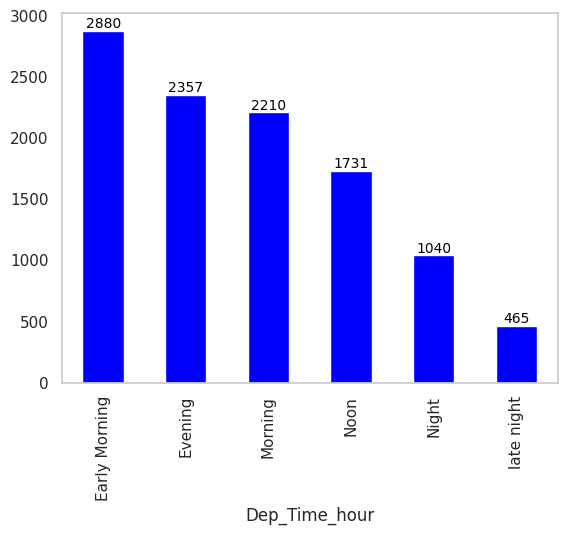

In [53]:
ax=data['Dep_Time_hour'].apply(flight_dep_time).value_counts().plot(kind="bar",color="blue")
for bar in ax.patches:
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height(),
            f'{bar.get_height()}', ha='center', va='bottom', fontsize=10, color='black')
ax.grid(False)  # Disables grid lines


In [54]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Cabin_Class,Number_of_Stops,...,Is_Holiday_Season,Is_Peak_Season,ATF_Price_INR,Day,Month,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,Business,1,...,0,1,69138.413075,24,3,2019,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,First Class,3,...,1,1,84243.611387,1,5,2019,5,50,13,15


function adds '0h' if hours are missing, and '0m' if minutes are missing in the duration.


In [55]:
def prepocess_duration(x):
  if 'h' not in x:
      x = '0h'+' '+ x
  elif 'm' not in x:
      x = x + ' '+'0m'
  return x

In [56]:
# Applies the 'preprocess_duration' function to ensure the 'Duration' column has both hours and minutes.

data['Duration']=data['Duration'].apply(prepocess_duration)

In [57]:
data['Duration']

,Duration
0,2h 50m
1,7h 25m
2,19h 0m
3,5h 25m
4,4h 45m
...,...
10678,2h 30m
10679,2h 35m
10680,3h 0m
10681,2h 40m


 Extracts hours and minutes from the 'Duration' column, removes 'h' and 'm',
 and converts them into integers

In [58]:
data['Duration_hours'] = data['Duration'].str.split(' ').str[0].str.replace('h', '').astype(int)
data['Duration_minutes'] = data['Duration'].str.split(' ').str[1].str.replace('m', '').astype(int)

In [59]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Cabin_Class,Number_of_Stops,...,ATF_Price_INR,Day,Month,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,Business,1,...,69138.413075,24,3,2019,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,First Class,3,...,84243.611387,1,5,2019,5,50,13,15,7,25


In [60]:
# Converts the 'Duration' column into total minutes by multiplying hours by 60 and adding minutes.

data['Duration_total_mins']=data['Duration'].str.replace('h',"*60").str.replace(' ','+').str.replace('m' ,"*1").apply(eval)

Visualizing the Relationship Between Flight Duration, Price, and Total Stops

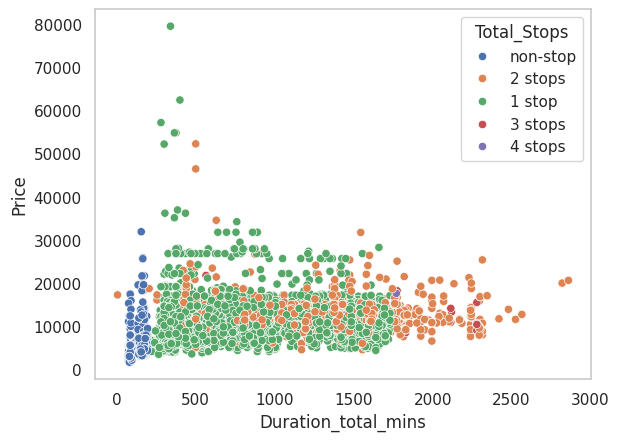

In [61]:
sns.scatterplot(x="Duration_total_mins" ,y= "Price", hue="Total_Stops" ,data=data)
# Remove grid lines
plt.grid(False)

Analyzing the Linear Relationship Between Flight Duration and Ticket Price

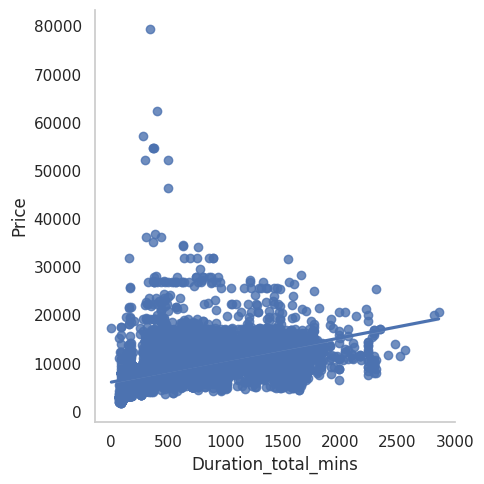

In [62]:
#lmplot means linear model plot i.e scatter plot with regression line
sns.lmplot(x="Duration_total_mins", y="Price", data=data)
# Remove grid lines
plt.grid(False)

Extracting Categorical Columns from a Dataset

In [63]:
#Loops through all columns in the DataFrame and appends the names of categorical columns (dtype 'object') to the Categorical_Column list.
Categorical_Column = []
for col in data.columns:
    if data[col].dtype == 'object':
        Categorical_Column.append(col)


In [64]:
print(Categorical_Column)


['Airline', 'Source', 'Destination', 'Route', 'Duration', 'Total_Stops', 'Additional_Info', 'Cabin_Class', 'Flight_Layover']


 Extracting numerical columns from the dataset

In [65]:
Numerical_column = []
for col in data.columns:
    if data[col].dtype != 'object':
        Numerical_column.append(col)


In [66]:
print(Numerical_column)


['Price', 'Number_of_Stops', 'Booking_Date', 'Days_Until_Departure', 'Is_Holiday_Season', 'Is_Peak_Season', 'ATF_Price_INR', 'Day', 'Month', 'Year', 'Dep_Time_hour', 'Dep_Time_minute', 'Arrival_Time_hour', 'Arrival_Time_minute', 'Duration_hours', 'Duration_minutes', 'Duration_total_mins']


In [67]:
#to obtain unique values present in the 'Source' column
data['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [68]:
# Iterate over each unique value in the 'Source' column to create dummy variables
for sub_category in data['Source'].unique():
#Create a new column for each unique 'Source' category, where 1 indicates the presence of the category, 0 otherwise
  data[f'Source_{sub_category}'] = (data['Source'] == sub_category).astype(int)


In [69]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Cabin_Class,Number_of_Stops,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,Business,1,...,1,10,2,50,170,1,0,0,0,0
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,First Class,3,...,13,15,7,25,445,0,1,0,0,0


In [70]:
# calculate the average price for each airline and sort the results in ascending order
airlines = data.groupby(['Airline'])['Price'].mean().sort_values()
airlines

,Price
Airline,
Trujet,4140.000000
SpiceJet,4338.284841
Air Asia,5590.260188
IndiGo,5673.682903
GoAir,5861.056701
Vistara,7796.348643
Vistara Premium economy,8962.333333
Air India,9611.210616
Multiple carriers,10902.678094


In [71]:
#reseting the index values based on the average price
airlines = data.groupby(['Airline'])['Price'].mean().sort_values().index
airlines

Index(['Trujet', 'SpiceJet', 'Air Asia', 'IndiGo', 'GoAir', 'Vistara',
       'Vistara Premium economy', 'Air India', 'Multiple carriers',
       'Multiple carriers Premium economy', 'Jet Airways',
       'Jet Airways Business'],
      dtype='object', name='Airline')

In [72]:
# Create a dictionary with airlines and their corresponding indices
dict_airlines={key:index for index, key in enumerate(airlines,0)}
dict_airlines

{'Trujet': 0,
 'SpiceJet': 1,
 'Air Asia': 2,
 'IndiGo': 3,
 'GoAir': 4,
 'Vistara': 5,
 'Vistara Premium economy': 6,
 'Air India': 7,
 'Multiple carriers': 8,
 'Multiple carriers Premium economy': 9,
 'Jet Airways': 10,
 'Jet Airways Business': 11}

In [73]:
## Replace airline names with their corresponding indices from the dictionary
data['Airline']=data['Airline'].map(dict_airlines)
data['Airline']

,Airline
0,3
1,7
2,10
3,3
4,3
...,...
10678,2
10679,7
10680,10
10681,5


In [74]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Cabin_Class,Number_of_Stops,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,Business,1,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,First Class,3,...,13,15,7,25,445,0,1,0,0,0


In [75]:
#Get the unique values in the 'Destination' column
data['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [76]:
# Replace 'New Delhi' with 'Delhi' in the 'Destination' column and then get the unique values
data['Destination'] = data['Destination'].replace('New Delhi', 'Delhi')
data['Destination'].unique()

array(['Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Hyderabad'],
      dtype=object)

In [77]:
# Get the destinations sorted by their average price
destination = data.groupby(['Destination'])['Price'].mean().sort_values().index
destination

Index(['Kolkata', 'Hyderabad', 'Delhi', 'Banglore', 'Cochin'], dtype='object', name='Destination')

In [78]:
#Create a dictionary with destinations as keys and their indices as values
dict_destination={key:index for index, key in enumerate(destination,0)}
dict_destination

{'Kolkata': 0, 'Hyderabad': 1, 'Delhi': 2, 'Banglore': 3, 'Cochin': 4}

In [79]:
## Replace airline names with their corresponding indices from the dictionary
data['Destination']=data['Destination'].map(dict_destination)
data['Destination']

,Destination
0,2
1,3
2,4
3,3
4,2
...,...
10678,3
10679,3
10680,2
10681,2


In [80]:
data.head(2)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Cabin_Class,Number_of_Stops,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,Business,1,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,First Class,3,...,13,15,7,25,445,0,1,0,0,0


In [81]:
#Retrieve the unique values present in the 'Total_Stops' column
data['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', nan, '4 stops'],
      dtype=object)

 Create a dictionary mapping unique 'Total_Stops' values to numerical indices for standardization


In [82]:
Total_Stops=data['Total_Stops'].unique()

# Create the dictionary using the unique values
dict_Total_Stops = {key: index for index, key in enumerate(Total_Stops, 0)}
dict_Total_Stops

# Replace airline names with their corresponding indices from the dictionary
#data['Total_Stops']=data['Total_Stops'].map(Total_Stops)
#data['Total_Stops']
# Display the updated column
data.head(2)


,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Cabin_Class,Number_of_Stops,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,Business,1,...,1,10,2,50,170,1,0,0,0,0
1,7,Kolkata,3,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,First Class,3,...,13,15,7,25,445,0,1,0,0,0


In [83]:
data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Cabin_Class,Number_of_Stops,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,Business,1,...,1,10,2,50,170,1,0,0,0,0


In [84]:
data['Additional_Info'].unique()  # Changed 'Additional Info' to 'Additional_Info'

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [85]:
data['Additional_Info'].value_counts()

,count
Additional_Info,
No info,8345
In-flight meal not included,1982
No check-in baggage included,320
1 Long layover,19
Change airports,7
Business class,4
No Info,3
1 Short layover,1
Red-eye flight,1


Calculate the percentage distribution of each unique value in the 'Additional_Info' column


In [86]:
data['Additional_Info'].value_counts()/len(data)*100

,count
Additional_Info,
No info,78.114762
In-flight meal not included,18.552841
No check-in baggage included,2.995413
1 Long layover,0.177853
Change airports,0.065525
Business class,0.037443
No Info,0.028082
1 Short layover,0.009361
Red-eye flight,0.009361


In [87]:
data.head(1)

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Cabin_Class,Number_of_Stops,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,Banglore,2,BLR → DEL,2h 50m,non-stop,No info,3897,Business,1,...,1,10,2,50,170,1,0,0,0,0


Remove the 'Additional_Info', 'Source', 'Route', and 'Duration' columns from the dataset to clean the data


In [88]:
data.drop(columns=['Additional_Info','Source','Route','Duration','Flight_Layover'],axis=1,inplace=True)
data.head(2)

,Airline,Destination,Total_Stops,Price,Cabin_Class,Number_of_Stops,Booking_Date,Days_Until_Departure,Is_Holiday_Season,Is_Peak_Season,...,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,non-stop,3897,Business,1,2019-02-06,46,0,1,...,1,10,2,50,170,1,0,0,0,0
1,7,3,2 stops,7662,First Class,3,2019-04-24,7,1,1,...,13,15,7,25,445,0,1,0,0,0


cabin class


In [89]:
data['Cabin_Class'].unique()

array(['Business', 'First Class', 'Economy'], dtype=object)

In [90]:
# Get the unique values of the 'Cabin_Class' column from the DataFrame
Cabin_Class = data['Cabin_Class'].unique()

# Create the dictionary using the unique values
dict_Cabin_Class = {key: index for index, key in enumerate(Cabin_Class, 0)}
dict_Cabin_Class



{'Business': 0, 'First Class': 1, 'Economy': 2}

Convert 'Cabin_Class' values to numerical values using the 'dict_Cabin_Class' mapping


In [91]:
data['Cabin_Class']=data['Cabin_Class'].map(dict_Cabin_Class)
data['Cabin_Class']

,Cabin_Class
0,0
1,1
2,2
3,2
4,2
...,...
10678,2
10679,2
10680,2
10681,0


Create a dictionary to map 'Total_Stops' values to numbers


In [92]:
Total_Stops = data['Total_Stops'].unique()

# Create the dictionary using the unique values
dict_Total_Stops = {key: index for index, key in enumerate(Total_Stops, 0)}
dict_Total_Stops


{'non-stop': 0, '2 stops': 1, '1 stop': 2, '3 stops': 3, nan: 4, '4 stops': 5}

Map 'Total_Stops' values to numerical values using the 'dict_Total_Stops' dictionary


In [93]:
data['Total_Stops']=data['Total_Stops'].map(dict_Total_Stops)
data['Total_Stops']

,Total_Stops
0,0
1,1
2,1
3,2
4,2
...,...
10678,0
10679,0
10680,0
10681,0


Set pandas option to display all columns in the DataFrame for better visibility


In [94]:
# Set pandas option to display all columns
pd.set_option('display.max_columns', None)

# Display the DataFrame
data


,Airline,Destination,Total_Stops,Price,Cabin_Class,Number_of_Stops,Booking_Date,Days_Until_Departure,Is_Holiday_Season,Is_Peak_Season,ATF_Price_INR,Day,Month,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
0,3,2,0,3897,0,1,2019-02-06,46,0,1,69138.413075,24,3,2019,22,20,1,10,2,50,170,1,0,0,0,0
1,7,3,1,7662,1,3,2019-04-24,7,1,1,84243.611387,1,5,2019,5,50,13,15,7,25,445,0,1,0,0,0
2,10,4,1,13882,2,3,2019-05-30,10,0,0,68359.393927,9,6,2019,9,25,4,25,19,0,1140,0,0,1,0,0
3,3,3,2,6218,2,2,2019-03-15,58,1,1,84463.842854,12,5,2019,18,5,23,30,5,25,325,0,1,0,0,0
4,3,2,2,13302,2,2,2019-01-13,47,1,1,84973.279224,1,3,2019,16,50,21,35,4,45,285,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,2,3,0,4107,2,1,2019-02-19,49,0,1,65545.633666,9,4,2019,19,55,22,25,2,30,150,0,1,0,0,0
10679,7,3,0,4145,2,1,2019-04-23,4,0,1,87890.929570,27,4,2019,20,45,23,20,2,35,155,0,1,0,0,0
10680,10,2,0,7229,2,1,2019-03-11,47,0,1,89606.608098,27,4,2019,8,20,11,20,3,0,180,1,0,0,0,0
10681,5,2,0,12648,0,1,2019-02-20,9,1,1,89087.538833,1,3,2019,11,30,14,10,2,40,160,1,0,0,0,0


Identifying Outliers in the 'Price' Column Using the IQR (Interquartile Range) Method


In [95]:
Q1 = data['Price'].quantile(0.25)
Q3 = data['Price'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers of the price
outliers= data[(data['Price'] < lower_bound) | (data['Price'] > upper_bound)]
outliers

,Airline,Destination,Total_Stops,Price,Cabin_Class,Number_of_Stops,Booking_Date,Days_Until_Departure,Is_Holiday_Season,Is_Peak_Season,ATF_Price_INR,Day,Month,Year,Dep_Time_hour,Dep_Time_minute,Arrival_Time_hour,Arrival_Time_minute,Duration_hours,Duration_minutes,Duration_total_mins,Source_Banglore,Source_Kolkata,Source_Delhi,Source_Chennai,Source_Mumbai
123,7,4,2,27430,0,2,2019-01-21,39,1,1,78355.586842,1,3,2019,23,0,19,15,20,15,1215,0,0,1,0,0
396,8,4,2,36983,2,2,2019-01-06,54,1,1,64679.835610,1,3,2019,12,50,19,15,6,25,385,0,0,1,0,0
486,10,2,2,26890,0,2,2019-02-27,2,1,1,65879.485873,1,3,2019,8,55,15,15,6,20,380,1,0,0,0,0
510,10,2,2,26890,2,2,2019-02-01,28,1,1,65115.723711,1,3,2019,7,0,12,25,5,25,325,1,0,0,0,0
597,7,1,1,25139,0,3,2019-03-04,2,0,1,84862.125275,6,3,2019,9,40,15,15,29,35,1775,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10353,10,1,1,24210,2,3,2019-03-03,3,0,1,68140.470953,6,3,2019,19,50,16,50,21,0,1260,0,0,0,0,1
10364,11,2,2,57209,1,2,2019-01-12,48,1,1,89097.295565,1,3,2019,9,45,14,25,4,40,280,1,0,0,0,0
10383,10,2,2,26890,1,2,2019-01-01,59,1,1,71236.203565,1,3,2019,7,0,5,5,22,5,1325,1,0,0,0,0
10439,10,2,2,31825,0,2,2019-02-10,19,1,1,63661.147045,1,3,2019,18,40,9,0,14,20,860,1,0,0,0,0


In [96]:
# Print the lower bound value for detecting outliers in the 'Price' column

print(lower_bound)

-5367.0


In [97]:
# Print the upper bound value for detecting outliers in the 'Price' column

print(upper_bound)

23017.0


Visualizing Outliers in 'Price' Column Using Boxplot, Histogram, and Scatterplot


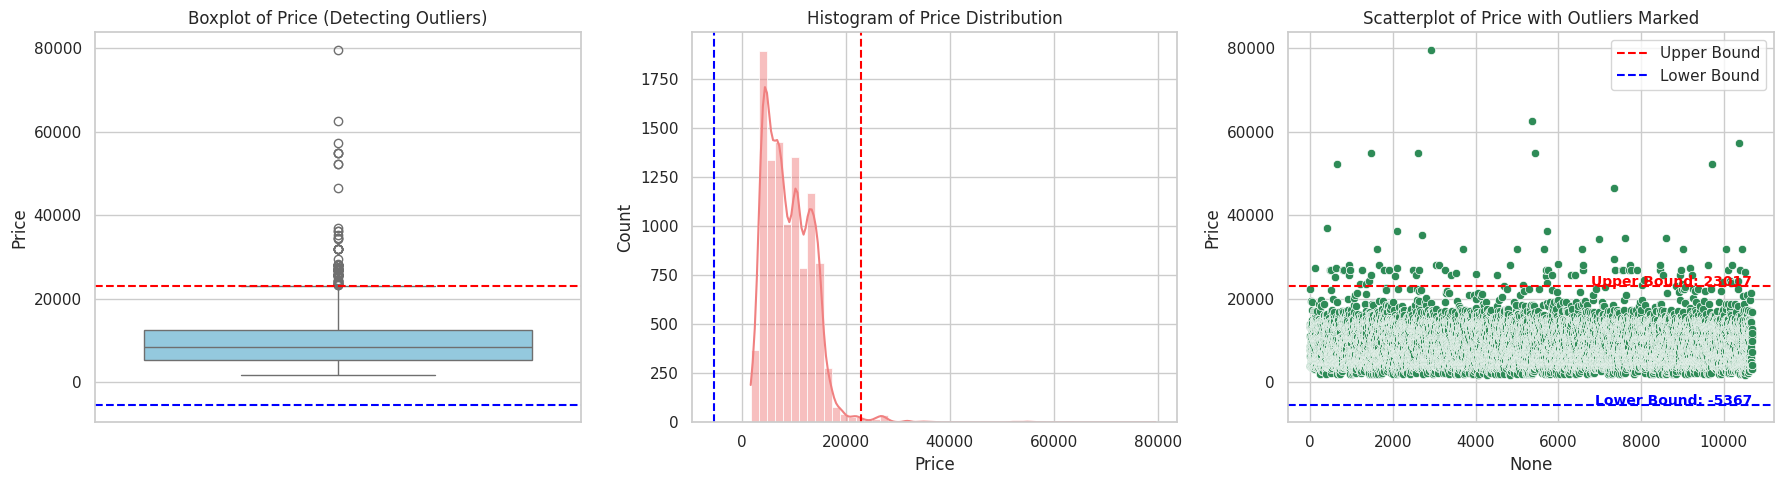

In [98]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Boxplot to show outliers
sns.boxplot(y=data['Price'], ax=axes[0], color='skyblue')
axes[0].set_title("Boxplot of Price (Detecting Outliers)")
axes[0].axhline(y=upper_bound, color='red', linestyle='dashed', label="Upper Bound")
axes[0].axhline(y=lower_bound, color='blue', linestyle='dashed', label="Lower Bound")

# Histogram to see price distribution
sns.histplot(data['Price'], bins=50, kde=True, ax=axes[1], color='lightcoral')
axes[1].set_title("Histogram of Price Distribution")
axes[1].axvline(x=upper_bound, color='red', linestyle='dashed', label="Upper Bound")
axes[1].axvline(x=lower_bound, color='blue', linestyle='dashed', label="Lower Bound")

# Scatterplot to identify outliers visually
sns.scatterplot(x=data.index, y=data['Price'], ax=axes[2], color='seagreen')
axes[2].axhline(y=upper_bound, color='red', linestyle='dashed', label="Upper Bound")
axes[2].axhline(y=lower_bound, color='blue', linestyle='dashed', label="Lower Bound")
# Annotate upper and lower bounds in scatterplot
axes[2].text(len(data) - 1, upper_bound, f'Upper Bound: {upper_bound:.0f}',
             color='red', ha='right', fontsize=10, fontweight='bold')
axes[2].text(len(data) - 1, lower_bound, f'Lower Bound: {lower_bound:.0f}',
             color='blue', ha='right', fontsize=10, fontweight='bold')
# Annotate outliers
for idx, row in outliers.iterrows():
    ax.annotate(f"{row['Price']:.0f}",
                     (idx, row['Price']),
                     textcoords="offset points",
                     xytext=(0,10), ha='center',
                     fontsize=9, color='red',
                     arrowprops=dict(arrowstyle="->", color='red'))
axes[2].legend()
axes[2].set_title("Scatterplot of Price with Outliers Marked")

plt.tight_layout()
plt.show()


In [99]:
# Calculate the number of outliers in the 'Price' column

len(outliers)

94

Top features by consedering all the feature

In [100]:
#X = data.drop(['Price'], axis=1)  # independent
#y = data['Price']  # dependent

#X['Booking_Date'] = pd.to_datetime(X['Booking_Date'])

# Now apply the toordinal() method
#X['Booking_Date'] = X['Booking_Date'].apply(lambda date: date.toordinal())


In [101]:
from sklearn.feature_selection import mutual_info_regression

In [102]:
X = data.drop(['Price'], axis=1)  # independent
y = data['Price']  # dependent
# Convert 'Booking_Date' to ordinal before calculating mutual information
X['Booking_Date'] = pd.to_datetime(X['Booking_Date'])  # Ensure it's datetime
X['Booking_Date'] = X['Booking_Date'].apply(lambda date: date.toordinal())

# Now calculate mutual information
imp = mutual_info_regression(X, y)
imp

array([1.32116549, 1.06981483, 0.78531648, 0.        , 0.78700971,
       0.13604567, 0.00278177, 0.09424588, 0.2695995 , 0.09102047,
       0.37135917, 0.62536823, 0.        , 0.9296075 , 0.76155574,
       1.14321691, 0.90504064, 1.11609563, 0.66442164, 1.7710422 ,
       0.39296295, 0.4518779 , 0.52111901, 0.13807343, 0.19865295])

In [103]:
imp_df = pd.DataFrame(imp , index=X.columns)
imp_df

,0
Airline,1.321165
Destination,1.069815
Total_Stops,0.785316
Cabin_Class,0.000000
Number_of_Stops,0.787010
Booking_Date,0.136046
Days_Until_Departure,0.002782
Is_Holiday_Season,0.094246
Is_Peak_Season,0.269599
ATF_Price_INR,0.091020


In [104]:
imp_df.columns = ['importance']
imp_df

,importance
Airline,1.321165
Destination,1.069815
Total_Stops,0.785316
Cabin_Class,0.000000
Number_of_Stops,0.787010
Booking_Date,0.136046
Days_Until_Departure,0.002782
Is_Holiday_Season,0.094246
Is_Peak_Season,0.269599
ATF_Price_INR,0.091020


In [105]:
imp_df.sort_values(by='importance' , ascending=False)

,importance
Duration_total_mins,1.771042
Airline,1.321165
Arrival_Time_hour,1.143217
Duration_hours,1.116096
Destination,1.069815
Dep_Time_hour,0.929607
Arrival_Time_minute,0.905041
Number_of_Stops,0.787010
Total_Stops,0.785316
Dep_Time_minute,0.761556


Feature Selection Using Mutual Information to Identify Top Predictive Features for 'Price'


🔹 Top Features based on Mutual Information:
 Duration_total_mins    1.774489
Airline                1.327042
Arrival_Time_hour      1.137400
Duration_hours         1.123543
Destination            1.063326
Dep_Time_hour          0.922331
Arrival_Time_minute    0.904902
Total_Stops            0.789178
Number_of_Stops        0.787331
Dep_Time_minute        0.764880
dtype: float64


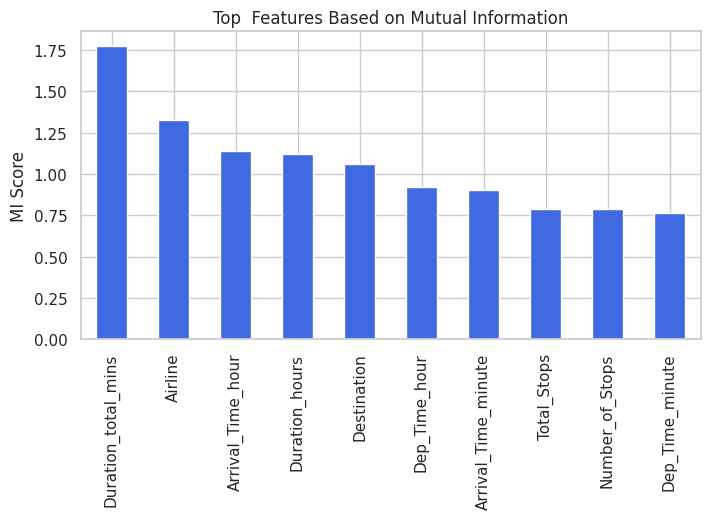

In [106]:
#from sklearn.feature_selection import mutual_info_regression

X = data.drop(['Price'] , axis=1) # independent
y = data['Price'] #dependent

# Convert 'Booking_Date' to ordinal before calculating mutual information
X['Booking_Date'] = pd.to_datetime(X['Booking_Date'])  # Ensure it's datetime
X['Booking_Date'] = X['Booking_Date'].apply(lambda date: date.toordinal()) # Convert to ordinal representation

### 1. Mutual Information
mi = mutual_info_regression(X, y)
mi_series = pd.Series(mi, index=X.columns).sort_values(ascending=False)
print("🔹 Top Features based on Mutual Information:\n", mi_series.head(10))

# Plot Mutual Information Scores
plt.figure(figsize=(8, 4))
mi_series.head(10).plot(kind='bar', color='royalblue')
plt.title("Top  Features Based on Mutual Information")
plt.ylabel("MI Score")
plt.show()

In [107]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import mutual_info_regression

Calculate and Visualize Mutual Information Between Features to Identify Relationships
[NO NEED JUST CHECK AT LAST]

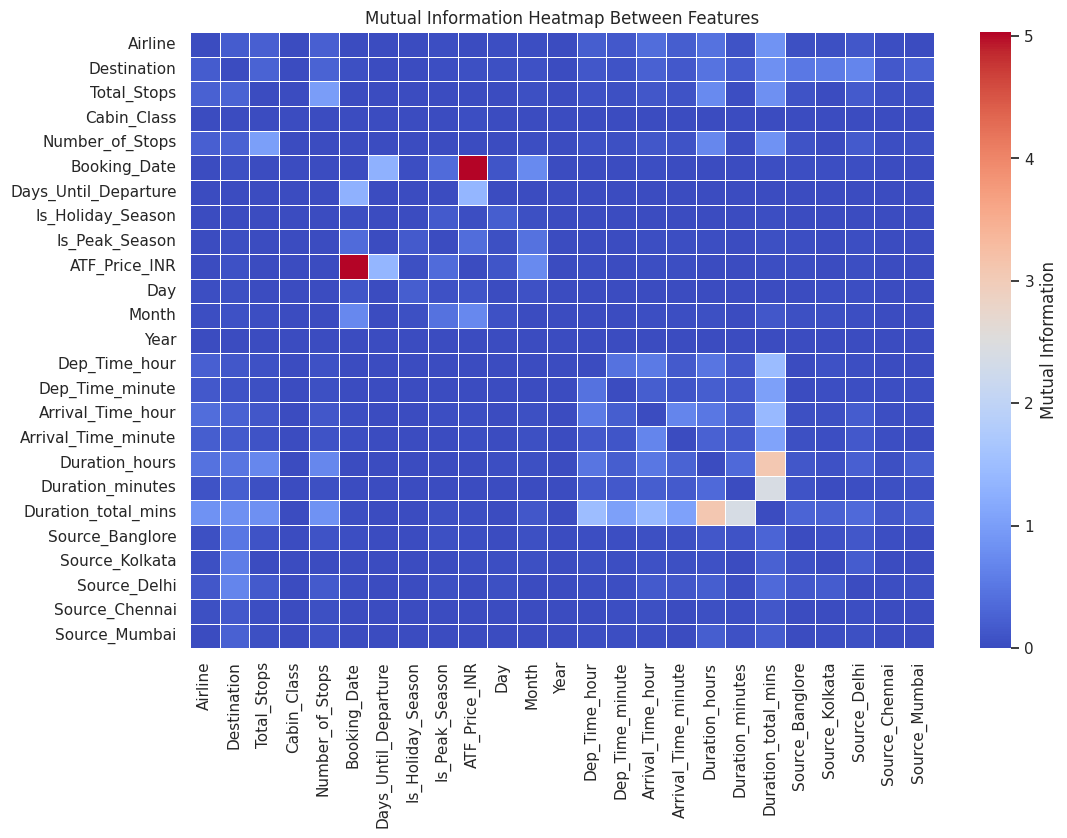

In [108]:
#from sklearn.feature_selection import mutual_info_regression

X = data.drop(['Price'] , axis=1)
# To handle categorical variables, let's first one-hot encode them
X_encoded = pd.get_dummies(X, drop_first=True)

# Create a matrix to store mutual information values
mi_matrix = np.zeros((X_encoded.shape[1], X_encoded.shape[1]))

# Compute mutual information between each pair of features
for i in range(X_encoded.shape[1]):
    for j in range(X_encoded.shape[1]):
        if i != j:
            # Calculate mutual information between feature i and feature j
            mi_matrix[i, j] = mutual_info_regression(X_encoded[[X_encoded.columns[i]]], X_encoded[X_encoded.columns[j]])[0]

# Convert the matrix to a DataFrame for better readability
mi_df = pd.DataFrame(mi_matrix, columns=X_encoded.columns, index=X_encoded.columns)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(mi_df, annot=False, cmap='coolwarm', fmt=".2f", linewidths=0.5, cbar_kws={'label': 'Mutual Information'})
plt.title("Mutual Information Heatmap Between Features")
plt.show()


Perform Recursive Feature Elimination (RFE) to Select Top Features and Visualize Rankings


🔹 RFE Feature Rankings (Lower is better):
 Days_Until_Departure     1
Number_of_Stops          1
Month                    1
Booking_Date             2
Day                      3
Source_Banglore          4
Total_Stops              5
Is_Peak_Season           6
Is_Holiday_Season        7
Source_Mumbai            8
Source_Chennai           9
Airline                 10
Source_Delhi            11
Cabin_Class             12
Source_Kolkata          13
Arrival_Time_hour       14
Dep_Time_hour           15
Destination             16
Dep_Time_minute         17
Duration_minutes        18
Duration_total_mins     19
Arrival_Time_minute     20
Duration_hours          21
ATF_Price_INR           22
Year                    23
dtype: int64

🔹 Top Features Selected by RFE:
 Index(['Number_of_Stops', 'Days_Until_Departure', 'Month'], dtype='object')


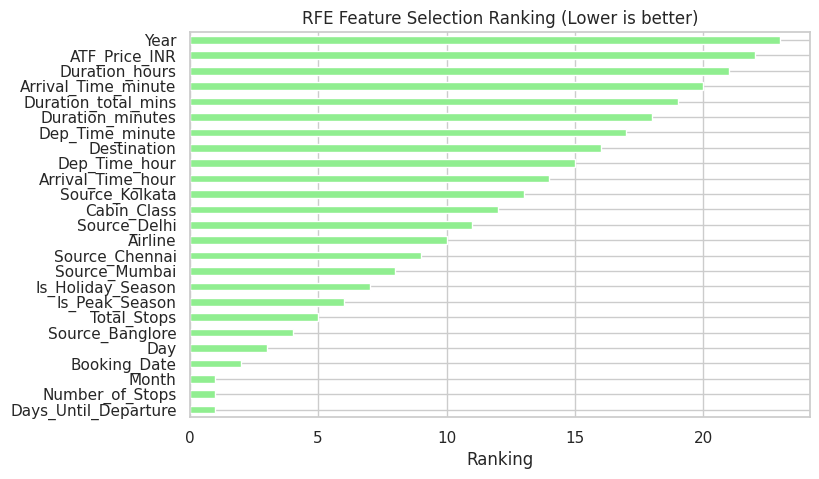

In [109]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression


# Initialize model
model = LinearRegression()

# Apply RFE to select top 3 features
# Convert 'Booking_Date' to ordinal before fitting RFE
X['Booking_Date'] = pd.to_datetime(X['Booking_Date'])  # Ensure it's datetime
X['Booking_Date'] = X['Booking_Date'].apply(lambda date: date.toordinal())

rfe = RFE(model, n_features_to_select=3)
rfe.fit(X, y)

# Get selected features
selected_features_rfe = X.columns[rfe.support_]

# Get feature rankings
feature_rankings = pd.Series(rfe.ranking_, index=X.columns).sort_values()

# Print RFE rankings
print("🔹 RFE Feature Rankings (Lower is better):\n", feature_rankings)

# Print top selected features
print("\n🔹 Top Features Selected by RFE:\n", selected_features_rfe)

# Plot RFE Rankings
plt.figure(figsize=(8, 5))
feature_rankings.plot(kind='barh', color='lightgreen')
plt.title("RFE Feature Selection Ranking (Lower is better)")
plt.xlabel("Ranking")
plt.show()

Feature Importance Evaluation Using Random Forest Model


Top Features based on Random Forest Importance:
 Duration_total_mins     0.411274
Airline                 0.169420
Day                     0.100644
Booking_Date            0.049079
Duration_hours          0.040329
Month                   0.037287
Arrival_Time_hour       0.026365
Days_Until_Departure    0.021092
ATF_Price_INR           0.020500
Dep_Time_hour           0.018929
Destination             0.017540
Dep_Time_minute         0.016479
Number_of_Stops         0.015578
Arrival_Time_minute     0.014223
Duration_minutes        0.011974
Cabin_Class             0.006572
Is_Holiday_Season       0.005626
Source_Kolkata          0.004295
Total_Stops             0.004235
Source_Banglore         0.002409
Source_Delhi            0.002379
Source_Mumbai           0.002100
Is_Peak_Season          0.001078
Source_Chennai          0.000593
Year                    0.000000
dtype: float64


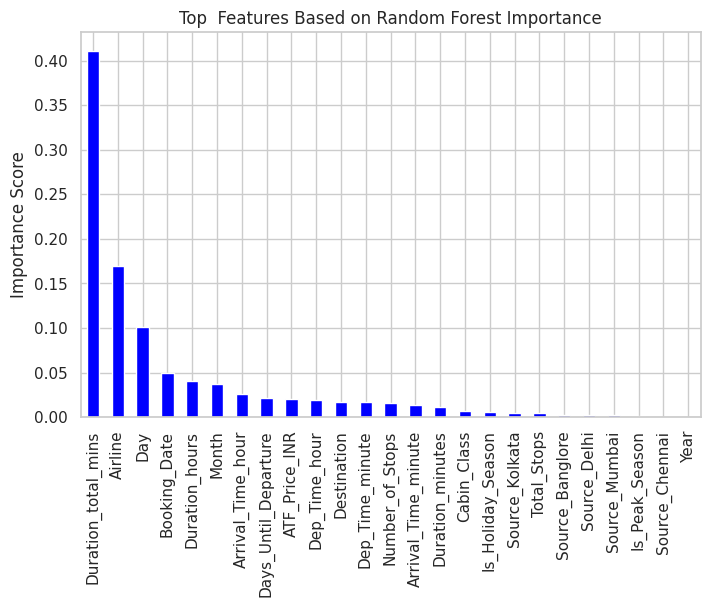

In [110]:
from sklearn.ensemble import RandomForestRegressor
X = data.drop(['Price'], axis=1)  # independent
y = data['Price']  # dependent
### 3. Feature Importance using Random Forest

# Convert 'Booking_Date' to ordinal before fitting the model
X['Booking_Date'] = pd.to_datetime(X['Booking_Date'])  # Ensure it's datetime
X['Booking_Date'] = X['Booking_Date'].apply(lambda date: date.toordinal())

random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X, y)
feature_importance = pd.Series(random_forest_model.feature_importances_, index=X.columns).sort_values(ascending=False)
print("Top Features based on Random Forest Importance:\n", feature_importance)

# Plot Feature Importances
plt.figure(figsize=(8, 5))
feature_importance.plot(kind='bar', color='blue')
plt.title("Top  Features Based on Random Forest Importance")
plt.ylabel("Importance Score")
plt.show()

In [111]:
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression # Import LinearRegression
from sklearn.model_selection import train_test_split  # Import train-test split function
from sklearn.tree import DecisionTreeRegressor  # Import Decision Tree Regressor


In [112]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

Linear regresion by considering all features

In [113]:
# Initialize the Linear Regression model
#ml_model = LinearRegression()

# Train the model using training data
#ml_model.fit(X_train, y_train)

# Predict on test data
#y_pred = ml_model.predict(X_test)

# Calculate evaluation metrics
#mae = mean_absolute_error(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
#print(f"Mean Absolute Error: {mae:.2f}")
#print(f"Mean Squared Error: {mse:.2f}")
#print(f"Root Mean Squared Error: {rmse:.2f}")
#print(f"R^2 Score: {r2:.4f}")


Decision Tree

In [114]:
# Decision Tree Regression Model Evaluation
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initialize the Decision Tree Regressor model
#ml_model = DecisionTreeRegressor(random_state=100)

# Train the model using training data
#ml_model.fit(X_train, y_train)

# Predict on test data
#y_pred = ml_model.predict(X_test)

# Calculate evaluation metrics
#mae = mean_absolute_error(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
#print(f"Mean Absolute Error: {mae:.2f}")
#print(f"Mean Squared Error: {mse:.2f}")
#print(f"Root Mean Squared Error: {rmse:.2f}")
#print(f"R^2 Score: {r2:.4f}")


Random Forest

In [115]:
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initialize and train the RandomForestRegressor model
#ml_model = RandomForestRegressor()
#ml_model.fit(X_train, y_train)

# Predict on test data
#y_pred = ml_model.predict(X_test)

# Calculate evaluation metrics
#mae = mean_absolute_error(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
#print(f"Mean Absolute Error: {mae:.2f}")
#print(f"Mean Squared Error: {mse:.2f}")
#print(f"Root Mean Squared Error: {rmse:.2f}")
#print(f"R^2 Score: {r2:.4f}")


XG Boost

In [116]:
# Split the dataset into training and testing sets
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initialize the Decision Tree Regressor model
#ml_model = DecisionTreeRegressor(random_state=100)

# Train the model using training data
#ml_model.fit(X_train, y_train)

# Predict on test data
#y_pred = ml_model.predict(X_test)

# Calculate evaluation metrics
#mae = mean_absolute_error(y_test, y_pred)
#mse = mean_squared_error(y_test, y_pred)
#rmse = np.sqrt(mse)
#r2 = r2_score(y_test, y_pred)

# Print evaluation metrics#
#print(f"Mean Absolute Error: {mae:.2f}")
#print(f"Mean Squared Error: {mse:.2f}")
#print(f"Root Mean Squared Error: {rmse:.2f}")
#print(f"R^2 Score: {r2:.4f}")


ML Pipeline

In [117]:
def predict(ml_model):
    print('Model is: {}'.format(ml_model))

    model= ml_model.fit(X_train,y_train)
    print("Training score: {}".format(model.score(X_train,y_train)))

    predictions = model.predict(X_test)
    print("Predictions are: {}".format(predictions))
    print('\n')

    # Compute Metrics
    r2 = r2_score(y_test, predictions)
    mae = mean_absolute_error(y_test, predictions)
    mse = mean_squared_error(y_test, predictions)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - predictions) / y_test)) * 100

    #r2score=r2_score(y_test,predictions)
    #print(f"R^2 Score: {r2:.4f}".format(r2score))

    print(f"R² Score: {r2:.4f}")
    print(f"Mean Absolute Error: {mae:.2f}")
    print(f"Mean Squared Error: {mse:.2f}")
    print(f"Root Mean Squared Error: {rmse:.2f}")
    print(f"Mean Absolute Percentage Error: {mape:.2f}%\n")
    sns.distplot(y_test-predictions)
    # Step 5: Save the trained model (Place this at the end of the script)
#with open('fare_prediction_model.pkl', 'wb') as file:
 #   pickle.dump(model, file)

#print("Model saved successfully!")

Model is: LinearRegression()
Training score: 0.5642519733772806
Predictions are: [13902.10005999  9098.96637237 11305.15773904 ... 11607.58567798
 12247.5561192  11616.00552642]


R² Score: 0.5862
Mean Absolute Error: 2048.07
Mean Squared Error: 8274797.77
Root Mean Squared Error: 2876.59
Mean Absolute Percentage Error: 26.42%



<ipython-input-117-a905f831cb74>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


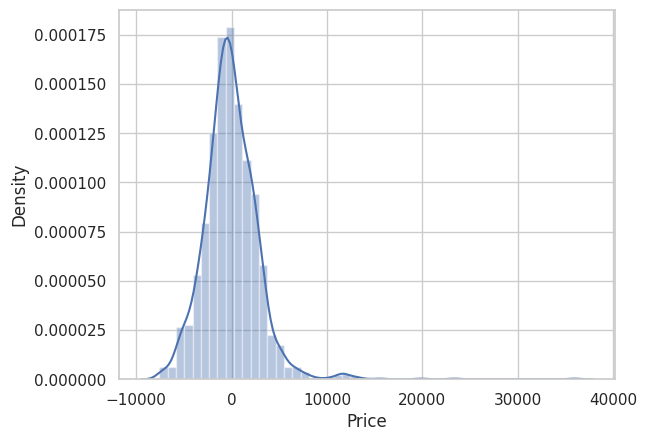

In [118]:
predict(LinearRegression())

Model is: DecisionTreeRegressor()
Training score: 0.9997487719582716
Predictions are: [19225. 12395. 10697. ... 16079. 16079. 13069.]


R² Score: 0.6885
Mean Absolute Error: 1413.99
Mean Squared Error: 6229698.56
Root Mean Squared Error: 2495.94
Mean Absolute Percentage Error: 15.93%



<ipython-input-117-a905f831cb74>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


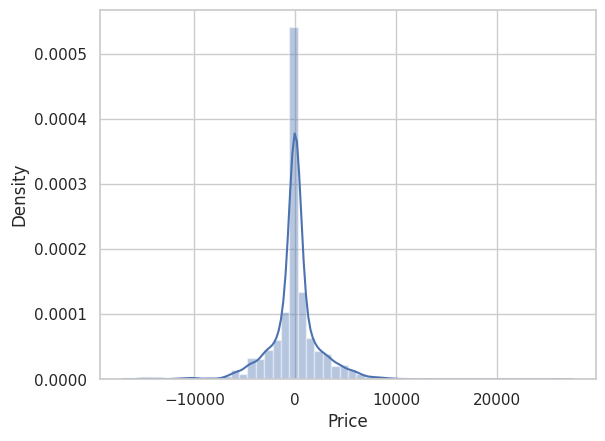

In [119]:
predict(DecisionTreeRegressor())

Model is: RandomForestRegressor()
Training score: 0.9760687604189654
Predictions are: [18531.86 12394.7  11127.64 ... 13946.95 13027.79 13454.45]


R² Score: 0.8444
Mean Absolute Error: 1152.75
Mean Squared Error: 3112509.80
Root Mean Squared Error: 1764.23
Mean Absolute Percentage Error: 13.40%



<ipython-input-117-a905f831cb74>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


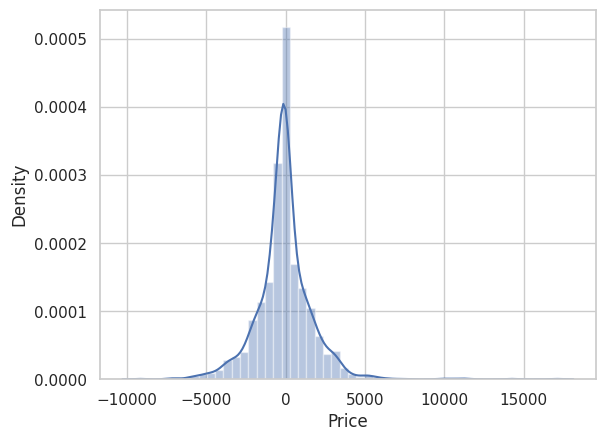

In [120]:
predict(RandomForestRegressor())

Model is: XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)
Training score: 0.9554493427276611
Predictions are: [16925.984 12868.513 12347.367 ... 13622.675 13795.421 14127.254]


R² Score: 0.8144
Mean Absolute Error: 1315.52
Mean Squared Error: 3712604.75
Root Mean Squared Error: 1926.81
Mean Absolute

<ipython-input-117-a905f831cb74>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


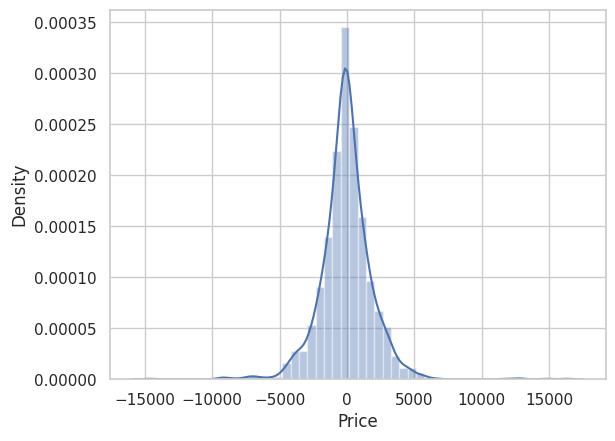

In [121]:
from xgboost import XGBRegressor
predict(XGBRegressor())

Model is: GradientBoostingRegressor()
Training score: 0.7860161745223226
Predictions are: [16654.05623839 12258.34179319 11751.90155478 ... 12090.64109387
 11954.79227607 12974.19454023]


R² Score: 0.7661
Mean Absolute Error: 1553.23
Mean Squared Error: 4677000.04
Root Mean Squared Error: 2162.64
Mean Absolute Percentage Error: 18.83%



<ipython-input-117-a905f831cb74>:26: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-predictions)


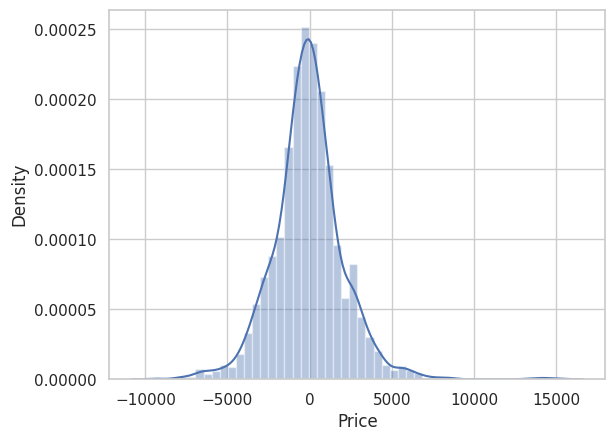

In [122]:
from sklearn.ensemble import GradientBoostingRegressor # Import the GradientBoostingRegressor class
predict(GradientBoostingRegressor())

Hypertuning using xg boost

In [123]:
import xgboost as xgb
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
import numpy as np

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

# Initialize XGBoost model with optimized parameters
xgb_model = xgb.XGBRegressor(
    n_estimators=2500,
    learning_rate=0.02,
    max_depth=10,
    subsample=0.09,
    colsample_bytree=0.95,
    gamma=0.05,
   # reg_alpha=0.1,  # L1 regularization
    #reg_lambda=1.0,  # L2 regularization
    random_state=100
)

# Fit the model with early stopping using eval_set
# Instead of early_stopping_rounds in fit, we now monitor using eval_set
xgb_model.fit(X_train,y_train)

# Predict on Test Data
y_pred = xgb_model.predict(X_test)

# Calculate Evaluation Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print Evaluation Metrics
print(f"R² Score: {r2:.4f}")
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Mean Squared Error: {mse:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")

R² Score: 0.7994
Mean Absolute Error: 1379.37
Mean Squared Error: 4010885.50
Root Mean Squared Error: 2002.72


<Figure size 1200x1000 with 0 Axes>

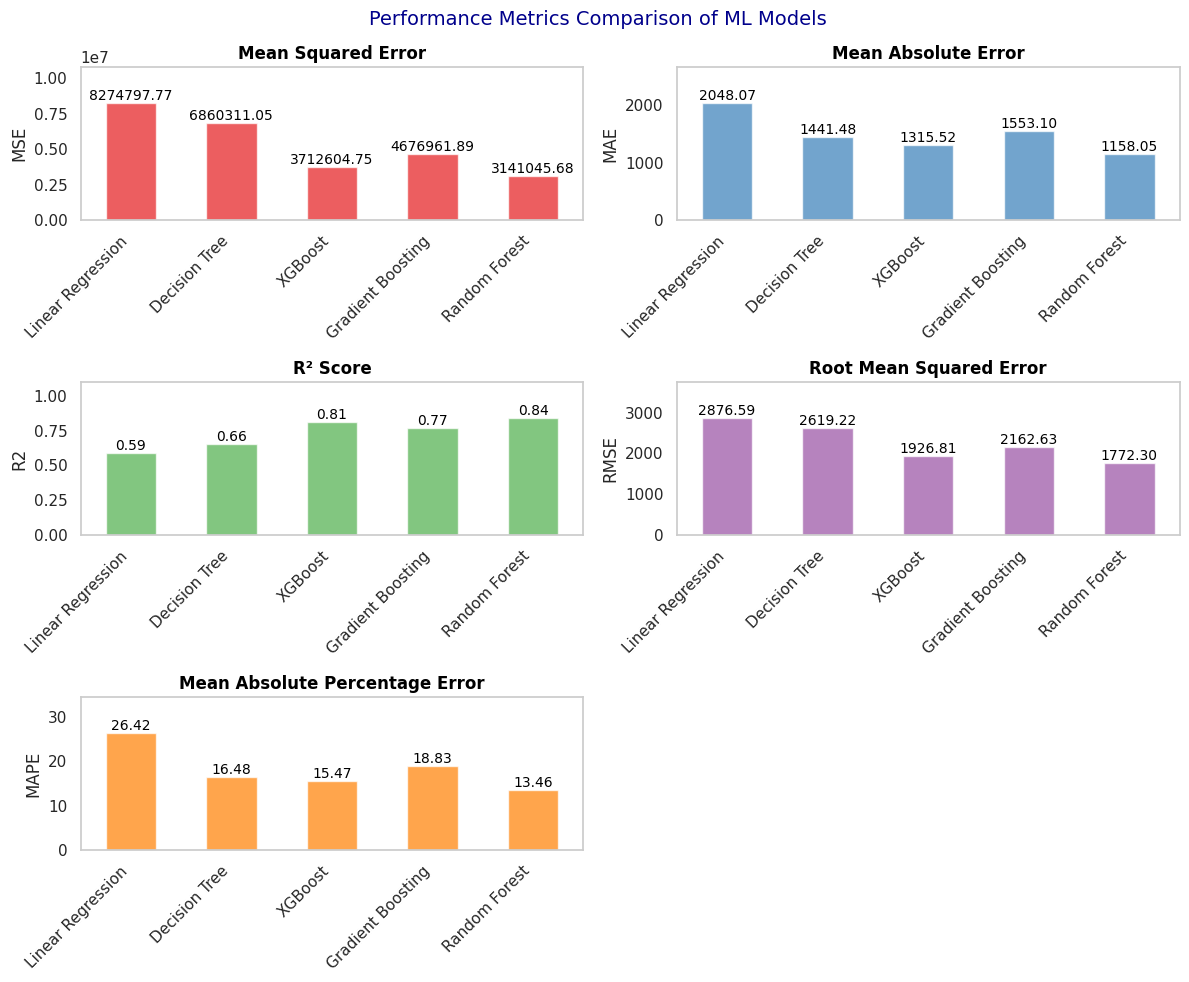

In [124]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Import ML models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor

# Define models
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(),
    "XGBoost": XGBRegressor(),
    "Gradient Boosting": GradientBoostingRegressor(),
    "Random Forest": RandomForestRegressor()
}

# Store metrics
metrics = {"MSE": [], "MAE": [], "R2": [], "RMSE": [], "MAPE": []}
model_names = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Compute Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100

    # Append calculated metrics
    metrics["MSE"].append(mse)
    metrics["MAE"].append(mae)
    metrics["R2"].append(r2)
    metrics["RMSE"].append(rmse)
    metrics["MAPE"].append(mape)

    model_names.append(name)

# Define full metric names for better visualization
metric_full_names = {
    "MSE": "Mean Squared Error",
    "MAE": "Mean Absolute Error",
    "R2": "R² Score",
    "RMSE": "Root Mean Squared Error",
    "MAPE": "Mean Absolute Percentage Error"
}
# Convert to DataFrame
df_metrics = pd.DataFrame(metrics, index=model_names)

# Set seaborn style for aesthetics
sns.set_style("whitegrid")
plt.figure(figsize=(12, 10))

# Create subplots
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 10))
fig.suptitle("Performance Metrics Comparison of ML Models", fontsize=14, color="darkblue")

metric_names = list(metrics.keys())
colors = sns.color_palette("Set1", 5)  # Using a nice color palette

for i, ax in enumerate(axes.flat[:5]):  # Only using first 5 subplots
    bars = df_metrics[metric_names[i]].plot(kind="bar", ax=ax, color=colors[i], alpha=0.7,)

    ax.set_title(metric_full_names[metric_names[i]], fontsize=12, fontweight="bold", color="black")
    ax.set_ylabel(metric_names[i], fontsize=12,)
    ax.set_xticklabels(model_names, rotation=45, ha="right")
    #ax.yaxis.grid(True, linestyle="--", alpha=0.7)

    # Adjust the Y-axis height (set the Y limits)
    ax.set_ylim(0, max(df_metrics[metric_names[i]]) * 1.3)  # 20% higher than max value for spacing

    # Add value labels to bars
    for bar in bars.patches:
        ax.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{bar.get_height():.2f}',
                ha='center', va='bottom', fontsize=10, color='black')
  # Remove grid lines
    ax.grid(False)
# Hide the empty subplot
axes[2, 1].axis("off")

plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()
